
<font  size='+5'><strong>Desafio Final: Setor Aéreo</strong></font>

<font color='MediumBlue'><strong>Base de dados: </strong></font> Históricos de voos de 2018 a 2022.


Os dados são uma amostra dos dados extraídos do Marketing Carrier On-Time Performance (Começando em January 2018) extraídos na TranStats data library e do kaggle:

<font color='MediumBlue'><strong>Dados Kaggle: </strong></font> [Clique Aqui](https://www.kaggle.com/datasets/robikscube/flight-delay-dataset-20182022 )

<font color='MediumBlue'><strong>Dicionário: </strong></font> [Clique Aqui](Dicion%C3%A1rio-de-dados.pdf) 




<font size='+2'><strong > Análise Exploratória</strong></font>

### Importação e cores

In [31]:
# Importação das Bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle
import seaborn as sns
from sklearn.linear_model import LinearRegression
import math
plt.style.available
plt.style.use('seaborn-v0_8-dark-palette')


In [32]:
def plot_colortable(colors, *, ncols=4, sort_colors=True):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12
    if sort_colors is True:
        names = sorted(
            colors, key=lambda c: tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(c))))
    else:
        names = list(colors)

    n = len(names)
    nrows = math.ceil(n / ncols)

    width = cell_width * ncols + 2 * margin
    height = cell_height * nrows + 2 * margin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-margin)/height)
    ax.set_xlim(0, cell_width * ncols)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                      height=18, facecolor=colors[name], edgecolor='0.7')
        )

    return fig

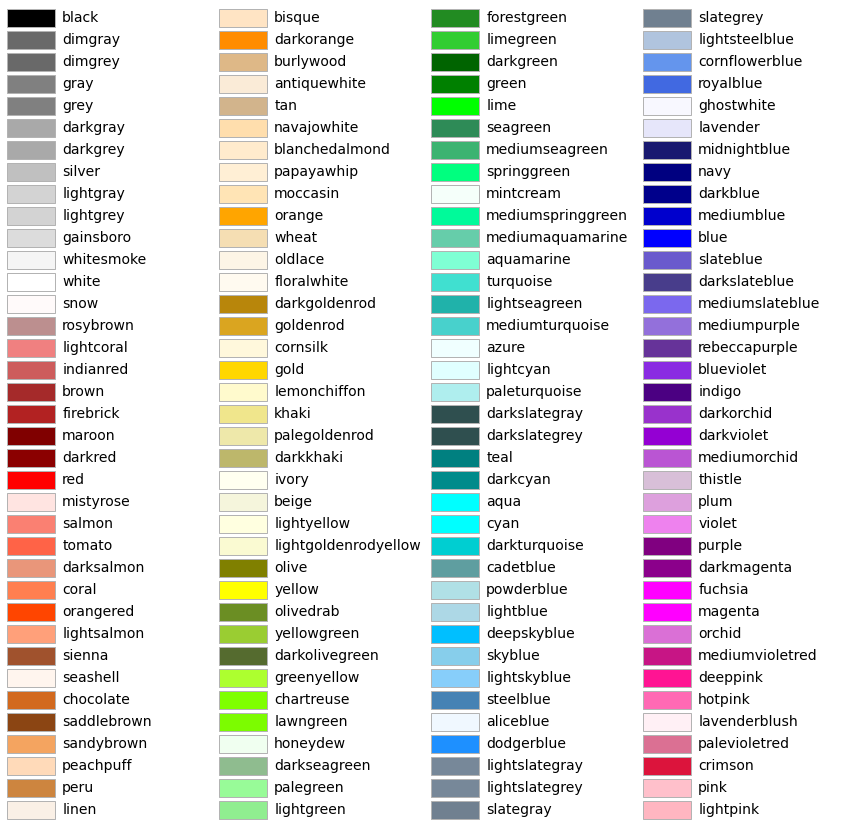

In [33]:
plot_colortable(mcolors.CSS4_COLORS)
plt.show()

### Importando o df de **Companhias aéreas**

In [34]:
df_airlines = pd.read_csv('Airlines.csv')
df_airlines

Code                    Description
0        02Q                  Titan Airways
1        04Q             Tradewind Aviation
2        05Q            Comlux Aviation, AG
3        06Q  Master Top Linhas Aereas Ltd.
4        07Q            Flair Airlines Ltd.
...      ...                            ...
1566      ZW    Air Wisconsin Airlines Corp
1567      ZX                   Air Georgian
1568  ZX (1)                     Airbc Ltd.
1569      ZY         Atlantic Gulf Airlines
1570     ZYZ           Skyway Aviation Inc.

[1571 rows x 2 columns]

### **2018**

In [35]:
flight_2018 = pd.read_csv('Sample_combined_flights_2018.csv')
flight_2018

Unnamed: 0  FlightDate                                    Airline  \
0               0  2018-01-05                          Endeavor Air Inc.   
1               1  2018-01-14                          Endeavor Air Inc.   
2               2  2018-01-04                          Endeavor Air Inc.   
3               3  2018-01-09                          Endeavor Air Inc.   
4               4  2018-01-15                          Endeavor Air Inc.   
...           ...         ...                                        ...   
56821       56821  2018-09-15                      United Air Lines Inc.   
56822       56822  2018-09-12                Air Wisconsin Airlines Corp   
56823       56823  2018-09-11  Commutair Aka Champlain Enterprises, Inc.   
56824       56824  2018-09-11   GoJet Airlines, LLC d/b/a United Express   
56825       56825  2018-09-11                Air Wisconsin Airlines Corp   

      Origin Dest  Cancelled  Diverted  CRSDepTime  DepTime  DepDelayMinutes  \
0        ATL  ABY      False     False        1037   1032.0              0.0   
1        ATL  ABY      False     False        1037   1031.0              0.0   
2        EWN  ATL       True     False        1415      NaN              NaN   
3        FAY  ATL      False     False        1853   1850.0              0.0   
4        CSG  ATL      False     False         615    625.0             10.0   
...      ...  ...        ...       ...         ...      ...              ...   
56821    ORD  RDU      False     False        1410   1408.0              0.0   
56822    ORD  PIA      False     False        1224   1216.0              0.0   
56823    EWR  CMH      False     False        1505   1503.0              0.0   
56824    MTJ  ORD      False     False        1240   1404.0             84.0   
56825    ROA  ORD      False     False         600    553.0              0.0   

       ...  WheelsOff  WheelsOn  TaxiIn  CRSArrTime  ArrDelay  ArrDel15  \
0      ...     1052.0    1121.0     3.0        1137     -13.0       0.0   
1      ...     1047.0    1117.0     3.0        1137     -17.0       0.0   
2      ...        NaN       NaN     NaN        1605       NaN       NaN   
3      ...     1900.0    2004.0    17.0        2030      -9.0       0.0   
4      ...      634.0     656.0     8.0         711      -7.0       0.0   
...    ...        ...       ...     ...         ...       ...       ...   
56821  ...     1428.0    1702.0     4.0        1714      -8.0       0.0   
56822  ...     1232.0    1257.0     5.0        1323     -21.0       0.0   
56823  ...     1534.0    1645.0     7.0        1652       0.0       0.0   
56824  ...     1424.0    1747.0    12.0        1629      90.0       1.0   
56825  ...      610.0     630.0     5.0         658     -23.0       0.0   

       ArrivalDelayGroups  ArrTimeBlk  DistanceGroup  DivAirportLandings  
0                    -1.0   1100-1159              1                 0.0  
1                    -2.0   1100-1159              1                 0.0  
2                     NaN   1600-1659              2                 0.0  
3                    -1.0   2000-2059              2                 0.0  
4                    -1.0   0700-0759              1                 0.0  
...                   ...         ...            ...                 ...  
56821                -1.0   1700-1759              3                 0.0  
56822                -2.0   1300-1359              1                 0.0  
56823                 0.0   1600-1659              2                 0.0  
56824                 6.0   1600-1659              5                 0.0  
56825                -2.0   0600-0659              3                 0.0  

[56826 rows x 62 columns]

In [36]:
# verificando o tamanho do dataset e tipos de variáveis
flight_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56826 entries, 0 to 56825
Data columns (total 62 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Unnamed: 0                               56826 non-null  int64  
 1   FlightDate                               56826 non-null  object 
 2   Airline                                  56826 non-null  object 
 3   Origin                                   56826 non-null  object 
 4   Dest                                     56826 non-null  object 
 5   Cancelled                                56826 non-null  bool   
 6   Diverted                                 56826 non-null  bool   
 7   CRSDepTime                               56826 non-null  int64  
 8   DepTime                                  55982 non-null  float64
 9   DepDelayMinutes                          55965 non-null  float64
 10  DepDelay                                 55965

### Cancelamentos

In [37]:
# verificando os voos NÃO CANCELADOS

false_cancelled = flight_2018[flight_2018['Cancelled'] == False]['Airline'].value_counts()
print('VOOS EFETIVOS')
print(false_cancelled)

print ('_____________________________________________________________________________________')

# voos de 2018 - Cancelados
true_cancelled = flight_2018[flight_2018['Cancelled'] == True]['Airline'].value_counts()
print('VOOS CANCELADOS')
print(true_cancelled)

VOOS EFETIVOS
Airline
Southwest Airlines Co.                       13312
United Air Lines Inc.                         6220
SkyWest Airlines Inc.                         5291
Delta Air Lines Inc.                          4593
American Airlines Inc.                        3741
JetBlue Airways                               2975
Republic Airlines                             1985
Alaska Airlines Inc.                          1833
Spirit Air Lines                              1753
ExpressJet Airlines Inc.                      1602
Mesa Airlines Inc.                            1502
Endeavor Air Inc.                             1195
Frontier Airlines Inc.                        1172
Envoy Air                                     1168
Comair Inc.                                   1076
Allegiant Air                                  975
Air Wisconsin Airlines Corp                    928
Horizon Air                                    880
Hawaiian Airlines Inc.                         844
Trans Sta

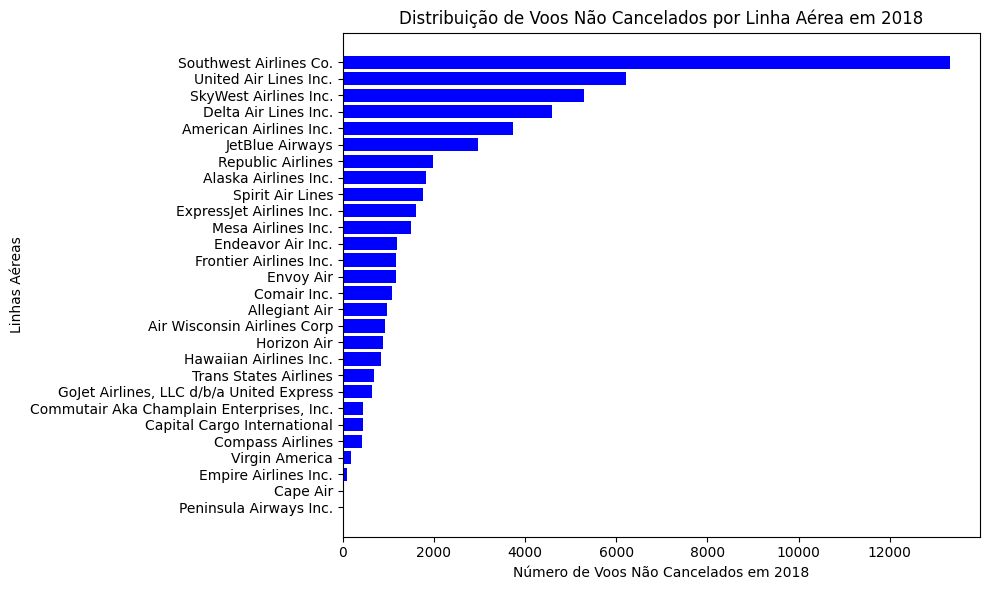

In [38]:
# Apenas os voos efetivos - COMPANHIAS AEREAS QUE MAIS VOARAM EM 2018

false_cancelled = flight_2018[flight_2018['Cancelled'] == False]['Airline'].value_counts()
false_cancelled = false_cancelled .sort_values(ascending=True)
plt.figure(figsize=(10, 6))
plt.barh(false_cancelled.index, false_cancelled.values, color='blue')
plt.xlabel('Número de Voos Não Cancelados em 2018')
plt.ylabel('Linhas Aéreas')
plt.title('Distribuição de Voos Não Cancelados por Linha Aérea em 2018')
plt.tight_layout()
plt.show()

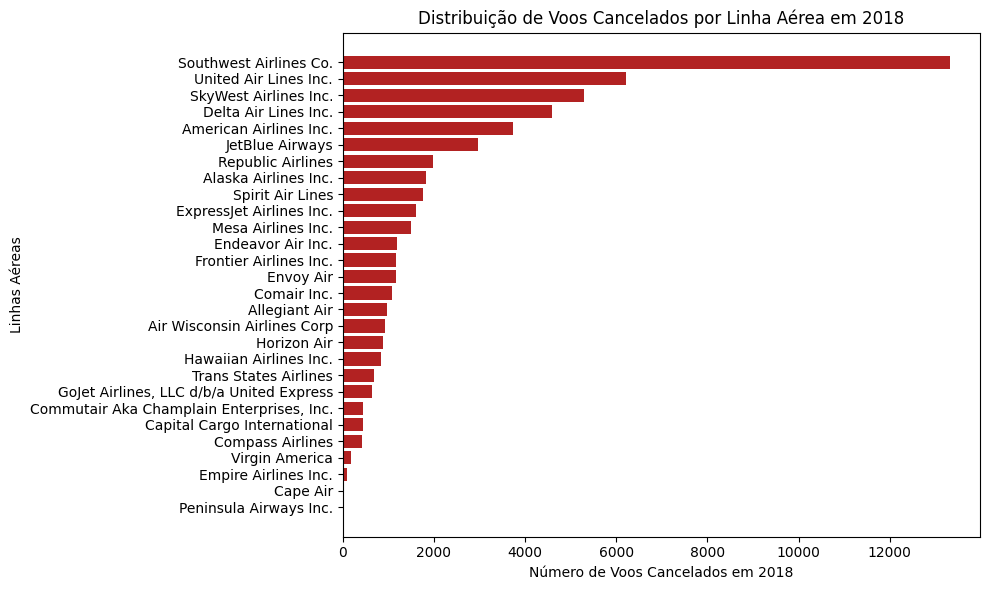

In [39]:
# Voos cancelados - companhias aéreas que mais mais cancelaram em 2018
true_cancelled = flight_2018[flight_2018['Cancelled'] == True]['Airline'].value_counts()
true_cancelled = true_cancelled.sort_values(ascending=True)
plt.figure(figsize=(10, 6))
plt.barh(false_cancelled.index, false_cancelled.values, color='firebrick')
plt.xlabel('Número de Voos Cancelados em 2018')
plt.ylabel('Linhas Aéreas')
plt.title('Distribuição de Voos Cancelados por Linha Aérea em 2018')
plt.tight_layout()
plt.show()

### Alterações de Voos - Diverted

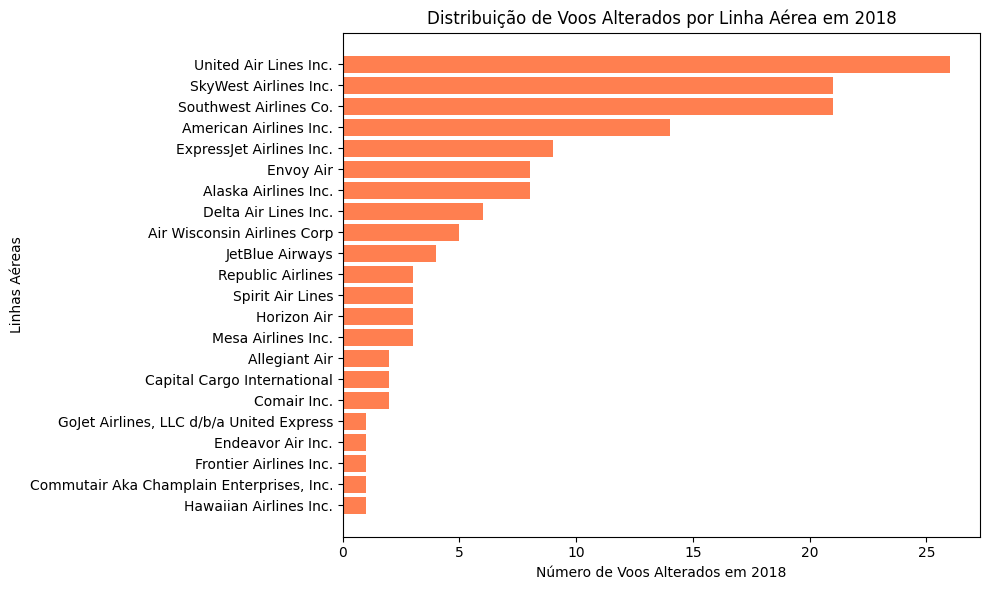

VOOS ALTERADOS
Airline
United Air Lines Inc.                        26
SkyWest Airlines Inc.                        21
Southwest Airlines Co.                       21
American Airlines Inc.                       14
ExpressJet Airlines Inc.                      9
Envoy Air                                     8
Alaska Airlines Inc.                          8
Delta Air Lines Inc.                          6
Air Wisconsin Airlines Corp                   5
JetBlue Airways                               4
Republic Airlines                             3
Spirit Air Lines                              3
Horizon Air                                   3
Mesa Airlines Inc.                            3
Allegiant Air                                 2
Capital Cargo International                   2
Comair Inc.                                   2
Endeavor Air Inc.                             1
Frontier Airlines Inc.                        1
Commutair Aka Champlain Enterprises, Inc.     1
GoJet Airlines, L

In [40]:
# Analisando as alterações de voo
diverted_true = flight_2018[flight_2018['Diverted'] == True]['Airline'].value_counts()
diverted_true = diverted_true .sort_values(ascending=True)
plt.figure(figsize=(10, 6))
plt.barh(diverted_true.index, diverted_true.values, color='coral')
plt.xlabel('Número de Voos Alterados em 2018')
plt.ylabel('Linhas Aéreas')
plt.title('Distribuição de Voos Alterados por Linha Aérea em 2018')
plt.tight_layout()
plt.show()
true_diverted = flight_2018[flight_2018['Diverted'] == True]['Airline'].value_counts()
print('VOOS ALTERADOS')
print(true_diverted)

### Rotas mais executadas

In [41]:
# criar uma coluna de Rotas
flight_2018['Route'] = flight_2018['Origin'] + ' to ' + flight_2018['Dest']

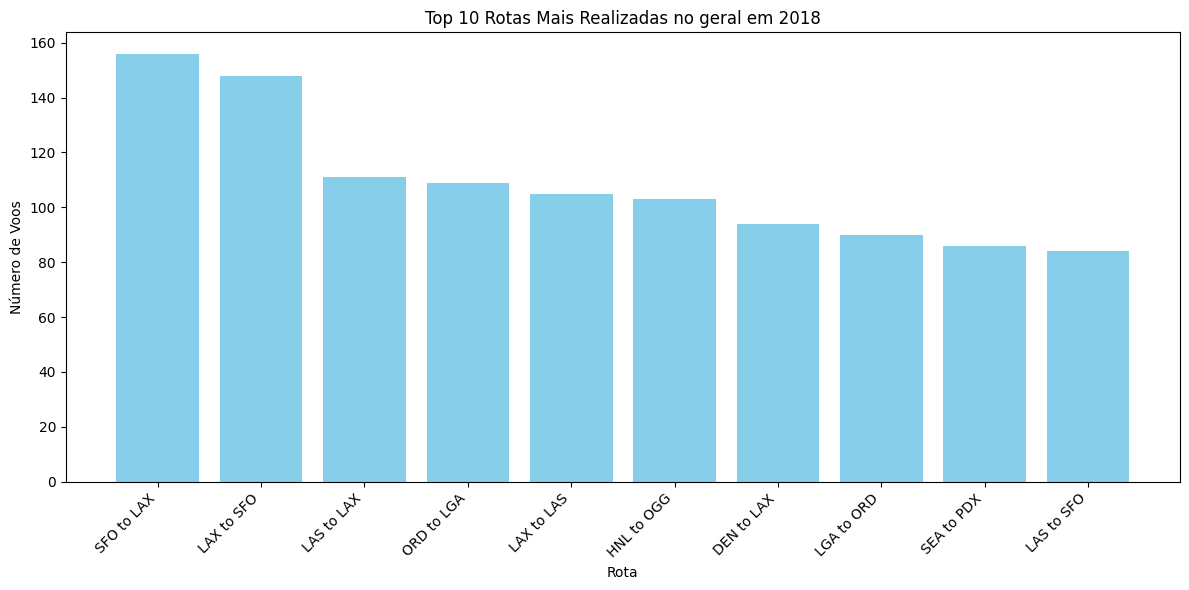

Route  Count
0     SFO to LAX    156
1     LAX to SFO    148
2     LAS to LAX    111
3     ORD to LGA    109
4     LAX to LAS    105
...          ...    ...
5401  MYR to DFW      1
5402  LAN to DCA      1
5403  JAN to DCA      1
5404  ORD to ALO      1
5405  MTJ to ORD      1

[5406 rows x 2 columns]

In [42]:
# Filtrar voos não cancelados
false_cancelled = flight_2018[flight_2018['Cancelled'] == False]
count_route = flight_2018['Route'].value_counts().reset_index()
count_route.columns = ['Route', 'Count']
plt.figure(figsize=(12, 6))
plt.bar(count_route['Route'][:10], count_route['Count'][:10], color='skyblue')
plt.xlabel('Rota')
plt.ylabel('Número de Voos')
plt.title('Top 10 Rotas Mais Realizadas no geral em 2018')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
count_route

C:\Users\hayan\AppData\Local\Temp\ipykernel_17340\3987306750.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  false_cancelled['Route'] = false_cancelled['Origin'] + ' to ' + false_cancelled['Dest']


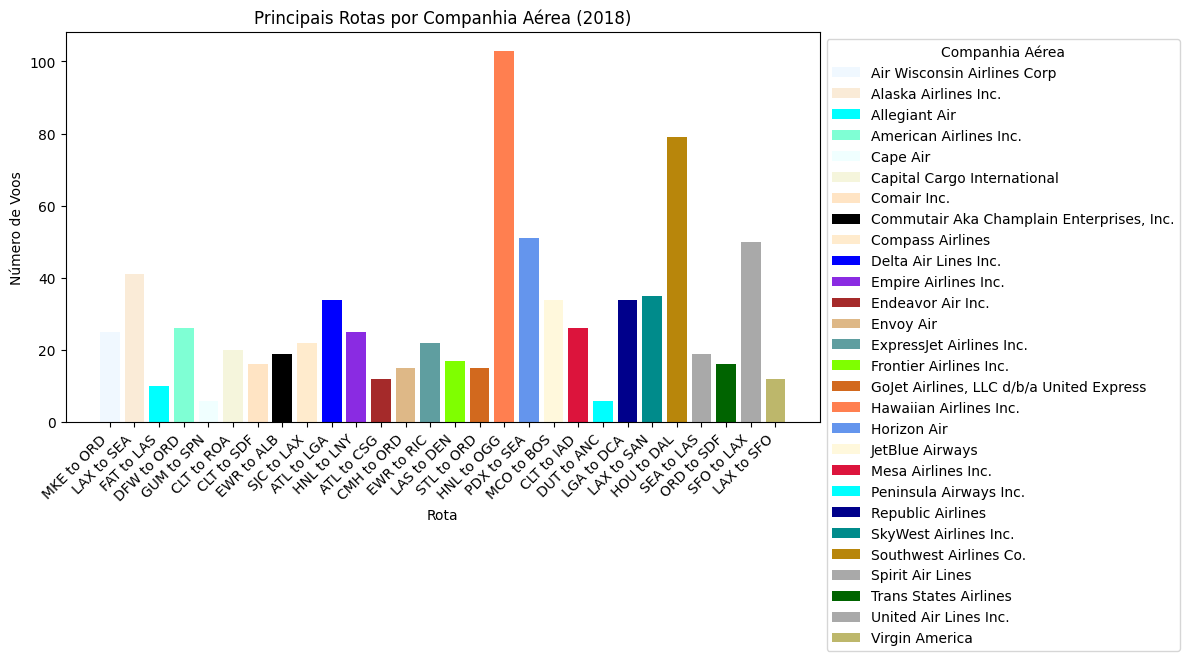

In [43]:
from matplotlib import colors as mcolors
# Filtrar voos não cancelados
false_cancelled = flight_2018[flight_2018['Cancelled'] == False]
false_cancelled['Route'] = false_cancelled['Origin'] + ' to ' + false_cancelled['Dest']
count_route_por_companhia = false_cancelled.groupby(['Airline', 'Route']).size().reset_index(name='Count')
top_routes_by_company = count_route_por_companhia.groupby('Airline').apply(lambda x: x.nlargest(1, 'Count')).reset_index(drop=True)
top_routes_by_company = top_routes_by_company.sort_values(by='Count', ascending=False)
cores_css4 = list(mcolors.CSS4_COLORS.values())
plt.figure(figsize=(12, 6))

for i, (airline, data) in enumerate(top_routes_by_company.groupby('Airline')):
    cor = cores_css4[i % len(cores_css4)]  # Ciclar pelas cores disponíveis
    plt.bar(data['Route'], data['Count'], label=airline, color=cor)

plt.xlabel('Rota')
plt.ylabel('Número de Voos')
plt.title('Principais Rotas por Companhia Aérea (2018)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Companhia Aérea', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


**Considerações do Flights_2018**


*   As 5 companhias que mais voaram, em 2018, foram :

```
Southwest Airlines Co.                       13312
United Air Lines Inc.                         6220
SkyWest Airlines Inc.                         5291
Delta Air Lines Inc.                          4593
American Airlines Inc.                        3741
```

*   E duas delas estão no ranking das 5 primeiras que mais canceleram:

```
Southwest Airlines Co.                       182**
SkyWest Airlines Inc.                         84**
Republic Airlines                             67
JetBlue Airways                               59
ExpressJet Airlines Inc.                      47

```


* Mais alteraram voos:

```
United Air Lines Inc.                        26
SkyWest Airlines Inc.                        21
Southwest Airlines Co.                       21
American Airlines Inc.                       14
ExpressJet Airlines Inc.                      9
```



### **2019**

In [44]:
flight_2019 = pd.read_csv('Sample_combined_flights_2019.csv')
flight_2019

Unnamed: 0  FlightDate                   Airline Origin Dest  \
0               0  2019-04-02                 Envoy Air    LIT  ORD   
1               1  2019-04-06                 Envoy Air    ACT  DFW   
2               2  2019-04-04                 Envoy Air    CLT  TYS   
3               3  2019-04-08                 Envoy Air    CLT  TYS   
4               4  2019-04-18                 Envoy Air    ORD  MSP   
...           ...         ...                       ...    ...  ...   
80968       80968  2019-01-18  ExpressJet Airlines Inc.    EWR  CVG   
80969       80969  2019-01-02  ExpressJet Airlines Inc.    IAH  STL   
80970       80970  2019-01-08  ExpressJet Airlines Inc.    IAH  STL   
80971       80971  2019-01-24  ExpressJet Airlines Inc.    LFT  IAH   
80972       80972  2019-01-06  ExpressJet Airlines Inc.    ORD  GSP   

       Cancelled  Diverted  CRSDepTime  DepTime  DepDelayMinutes  ...  \
0          False     False        1212   1200.0              0.0  ...   
1          False     False         525    512.0              0.0  ...   
2          False     False        1404   1400.0              0.0  ...   
3          False     False        1404   1359.0              0.0  ...   
4          False     False        1351   1350.0              0.0  ...   
...          ...       ...         ...      ...              ...  ...   
80968      False     False         746    737.0              0.0  ...   
80969      False     False        1829   1855.0             26.0  ...   
80970      False     False        1829   1821.0              0.0  ...   
80971      False     False         710    702.0              0.0  ...   
80972      False     False         830    828.0              0.0  ...   

       WheelsOff  WheelsOn  TaxiIn  CRSArrTime  ArrDelay  ArrDel15  \
0         1210.0    1339.0     9.0        1405     -17.0       0.0   
1          522.0     546.0    12.0         615     -17.0       0.0   
2         1419.0    1454.0     3.0        1504      -7.0       0.0   
3         1420.0    1501.0     5.0        1504       2.0       0.0   
4         1408.0    1504.0     3.0        1522     -15.0       0.0   
...          ...       ...     ...         ...       ...       ...   
80968      814.0     957.0     4.0        1007      -6.0       0.0   
80969     1910.0    2035.0     9.0        2035       9.0       0.0   
80970     1859.0    2038.0     7.0        2035      10.0       0.0   
80971      732.0     818.0     7.0         827      -2.0       0.0   
80972      851.0    1104.0     5.0        1124     -15.0       0.0   

       ArrivalDelayGroups  ArrTimeBlk  DistanceGroup  DivAirportLandings  
0                    -2.0   1400-1459              3                   0  
1                    -2.0   0600-0659              1                   0  
2                    -1.0   1500-1559              1                   0  
3                     0.0   1500-1559              1                   0  
4                    -1.0   1500-1559              2                   0  
...                   ...         ...            ...                 ...  
80968                -1.0   1000-1059              3                   0  
80969                 0.0   2000-2059              3                   0  
80970                 0.0   2000-2059              3                   0  
80971                -1.0   0800-0859              1                   0  
80972                -1.0   1100-1159              3                   0  

[80973 rows x 62 columns]

In [45]:
flight_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80973 entries, 0 to 80972
Data columns (total 62 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Unnamed: 0                               80973 non-null  int64  
 1   FlightDate                               80973 non-null  object 
 2   Airline                                  80973 non-null  object 
 3   Origin                                   80973 non-null  object 
 4   Dest                                     80973 non-null  object 
 5   Cancelled                                80973 non-null  bool   
 6   Diverted                                 80973 non-null  bool   
 7   CRSDepTime                               80973 non-null  int64  
 8   DepTime                                  79454 non-null  float64
 9   DepDelayMinutes                          79452 non-null  float64
 10  DepDelay                                 79452

### Cancelados

In [46]:
false_cancelled = flight_2019[flight_2019['Cancelled'] == False]['Airline'].value_counts()
print('VOOS EFETIVOS')
print(false_cancelled)

print ('_____________________________________________________________________________________')

# voos de 2019 - Cancelados
true_cancelled = flight_2019[flight_2019['Cancelled'] == True]['Airline'].value_counts()
print('VOOS CANCELADOS')
print(true_cancelled)

VOOS EFETIVOS
Airline
Southwest Airlines Co.                       13293
Delta Air Lines Inc.                          9962
American Airlines Inc.                        9392
SkyWest Airlines Inc.                         8124
United Air Lines Inc.                         6251
Republic Airlines                             3221
Envoy Air                                     3171
JetBlue Airways                               2959
Comair Inc.                                   2733
Alaska Airlines Inc.                          2579
Endeavor Air Inc.                             2505
Mesa Airlines Inc.                            2225
Spirit Air Lines                              2028
Frontier Airlines Inc.                        1348
ExpressJet Airlines Inc.                      1244
Horizon Air                                   1208
Capital Cargo International                   1168
Allegiant Air                                 1032
Air Wisconsin Airlines Corp                   1002
Compass A

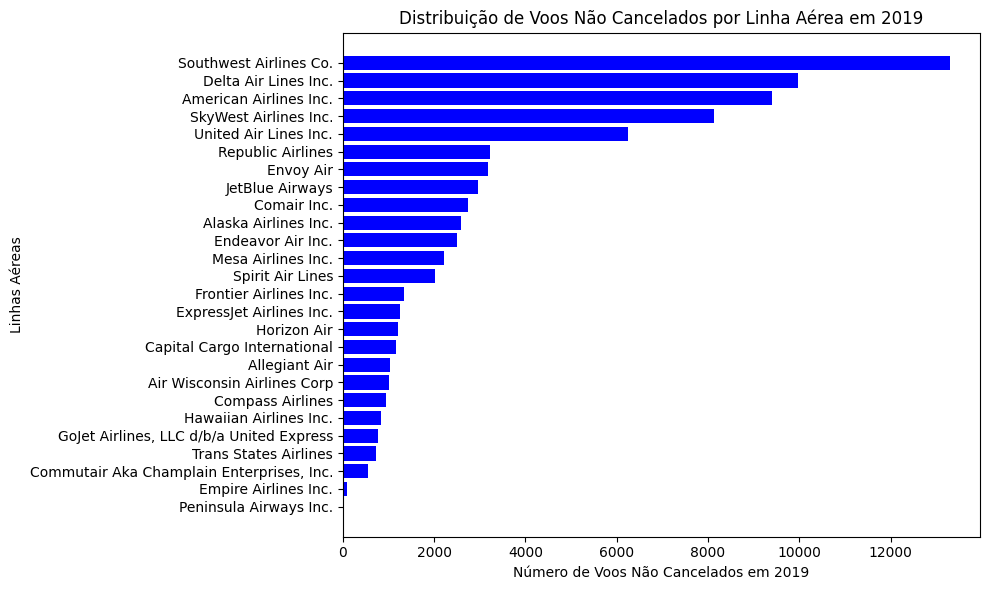

In [47]:
# Apenas os voos efetivos - COMPANHIAS AEREAS QUE MAIS VOARAM EM 2018
false_cancelled = flight_2019[flight_2019['Cancelled'] == False]['Airline'].value_counts()
false_cancelled = false_cancelled .sort_values(ascending=True)
plt.figure(figsize=(10, 6))
plt.barh(false_cancelled.index, false_cancelled.values, color='blue')
plt.xlabel('Número de Voos Não Cancelados em 2019')
plt.ylabel('Linhas Aéreas')
plt.title('Distribuição de Voos Não Cancelados por Linha Aérea em 2019')
plt.tight_layout()
plt.show()

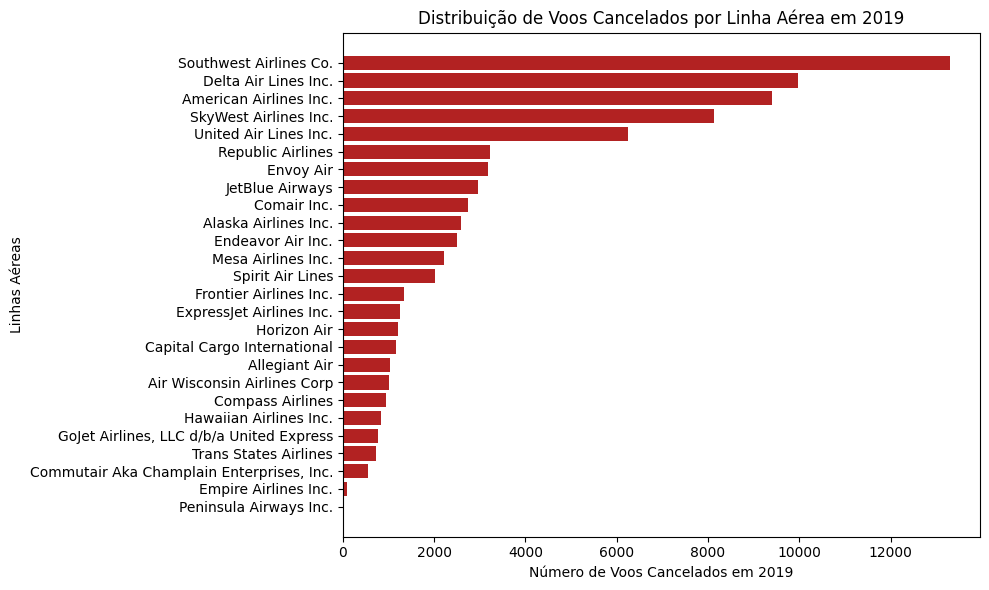

In [48]:
# Voos cancelados - companhias aéreas que mais mais cancelaram em 2019
true_cancelled = flight_2019[flight_2019['Cancelled'] == True]['Airline'].value_counts()
true_cancelled = true_cancelled.sort_values(ascending=True)
plt.figure(figsize=(10, 6))
plt.barh(false_cancelled.index, false_cancelled.values, color='firebrick')
plt.xlabel('Número de Voos Cancelados em 2019')
plt.ylabel('Linhas Aéreas')
plt.title('Distribuição de Voos Cancelados por Linha Aérea em 2019')
plt.tight_layout()
plt.show()

### Alterados

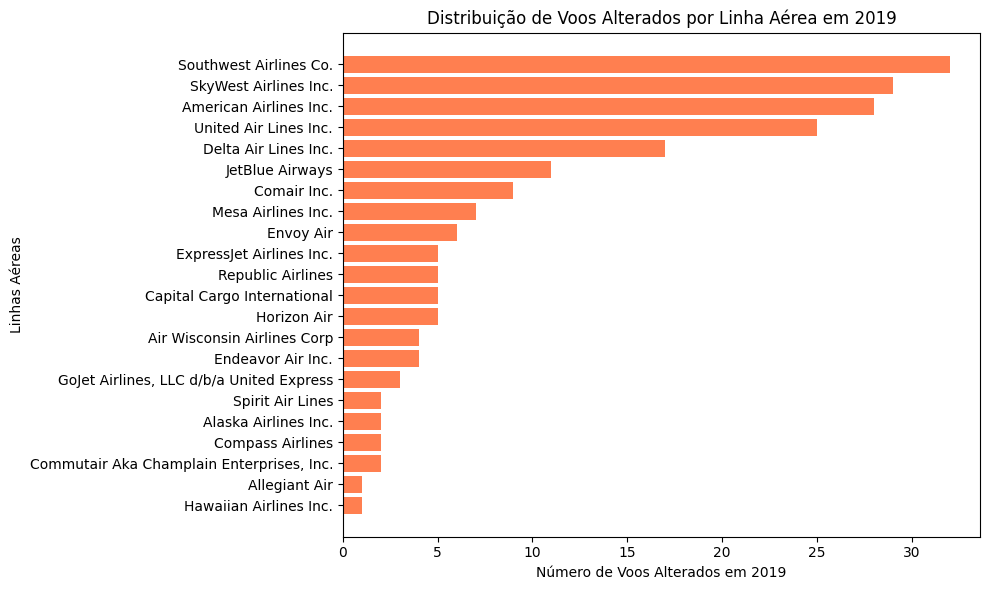

VOOS ALTERADOS
Airline
Southwest Airlines Co.                       32
SkyWest Airlines Inc.                        29
American Airlines Inc.                       28
United Air Lines Inc.                        25
Delta Air Lines Inc.                         17
JetBlue Airways                              11
Comair Inc.                                   9
Mesa Airlines Inc.                            7
Envoy Air                                     6
ExpressJet Airlines Inc.                      5
Republic Airlines                             5
Capital Cargo International                   5
Horizon Air                                   5
Air Wisconsin Airlines Corp                   4
Endeavor Air Inc.                             4
GoJet Airlines, LLC d/b/a United Express      3
Spirit Air Lines                              2
Alaska Airlines Inc.                          2
Compass Airlines                              2
Commutair Aka Champlain Enterprises, Inc.     2
Allegiant Air    

In [49]:
# Apenas os voos efetivos - COMPANHIAS AEREAS QUE MAIS VOARAM EM 2019
diverted_true = flight_2019[flight_2019['Diverted'] == True]['Airline'].value_counts()
diverted_true = diverted_true .sort_values(ascending=True)
plt.figure(figsize=(10, 6))
plt.barh(diverted_true.index, diverted_true.values, color='coral')
plt.xlabel('Número de Voos Alterados em 2019')
plt.ylabel('Linhas Aéreas')
plt.title('Distribuição de Voos Alterados por Linha Aérea em 2019')
plt.tight_layout()
plt.show()

true_diverted = flight_2019[flight_2019['Diverted'] == True]['Airline'].value_counts()
print('VOOS ALTERADOS')
print(true_diverted)

### Rotas mais executadas

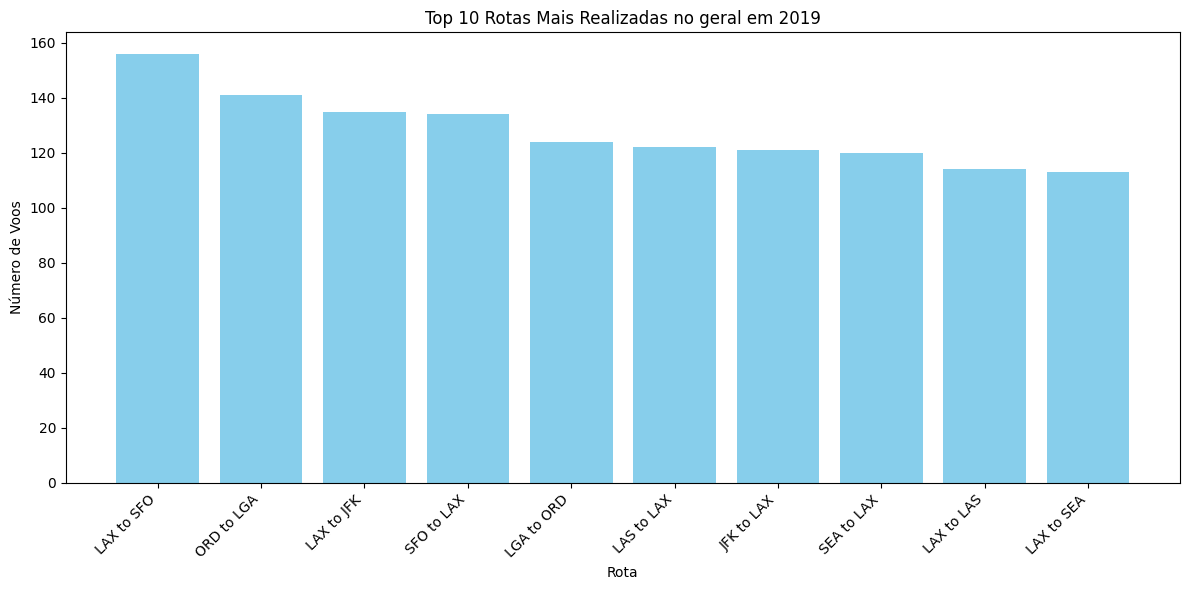

Route  Count
0     LAX to SFO    156
1     ORD to LGA    141
2     LAX to JFK    135
3     SFO to LAX    134
4     LGA to ORD    124
...          ...    ...
5743  DAL to PNS      1
5744  BDL to MYR      1
5745  AVL to TPA      1
5746  IAG to MYR      1
5747  LEX to EWR      1

[5748 rows x 2 columns]

In [50]:
flight_2019['Route'] = flight_2019['Origin'] + ' to ' + flight_2019['Dest']
flight_2019_nao_cancelados = flight_2019[flight_2019['Cancelled'] == False]
count_route = flight_2019['Route'].value_counts().reset_index()
count_route.columns = ['Route', 'Count']
plt.figure(figsize=(12, 6))
plt.bar(count_route['Route'][:10], count_route['Count'][:10], color='skyblue')
plt.xlabel('Rota')
plt.ylabel('Número de Voos')
plt.title('Top 10 Rotas Mais Realizadas no geral em 2019')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

count_route

### Considerações do Flight_2019:





**2018**

*   As 10 companhias que mais voaram, em 2018, foram :

```
Southwest Airlines Co.                       13312
United Air Lines Inc.                         6220
SkyWest Airlines Inc.                         5291
Delta Air Lines Inc.                          4593
American Airlines Inc.                        3741
JetBlue Airways                               2975
Republic Airlines                             1985
Alaska Airlines Inc.                          1833
Spirit Air Lines                              1753
ExpressJet Airlines Inc.                      1602

```

* **2019**


```
Southwest Airlines Co.                       13293
Delta Air Lines Inc.                          9962
American Airlines Inc.                        9392
SkyWest Airlines Inc.                         8124
United Air Lines Inc.                         6251
Republic Airlines                             3221
Envoy Air                                     3171
JetBlue Airways                               2959
Comair Inc.                                   2733
Alaska Airlines Inc.                          2579
```

* Não houve grande afetação no desempenho de 2018 a 2019. Pelo contrário, houve um desempenho melhor, se comparado a 2018, como podemos ver no gráfico abaixo:

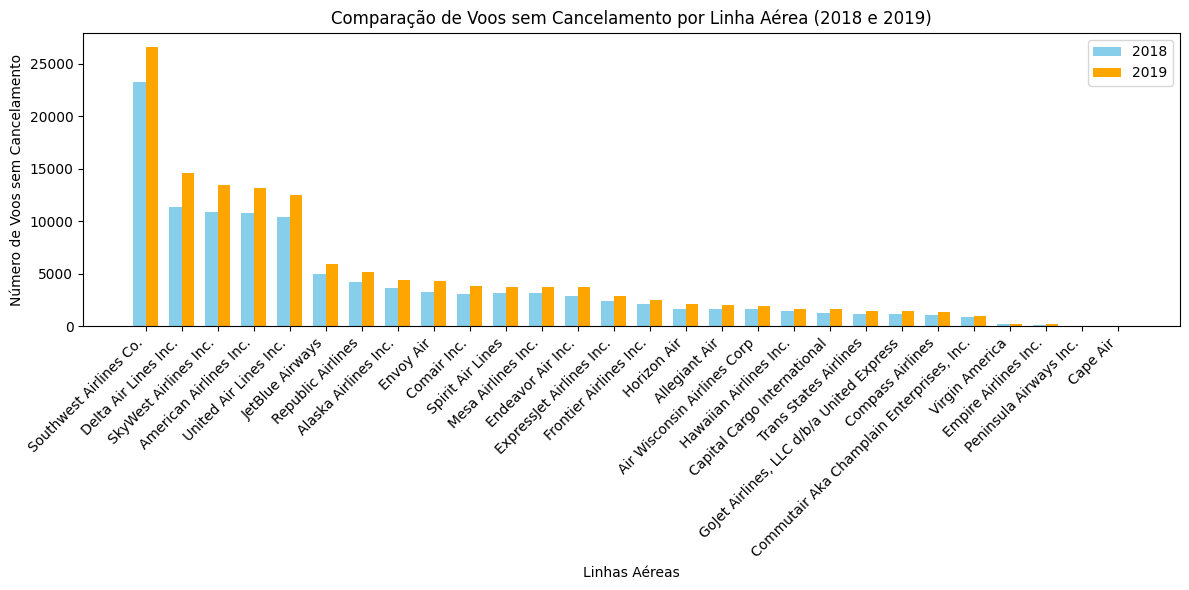

In [51]:
# Unindo os datasets de 2018 e 2019 para comparar o cancelamento
df_concat = pd.concat([flight_2018[['Cancelled', 'Airline']], flight_2019[['Cancelled', 'Airline']]])
df_cancel = df_concat[df_concat['Cancelled'] == False]
df_cancel_2018 = df_cancel[df_cancel.index.isin(flight_2018.index)]
df_cancel_2019 = df_cancel[df_cancel.index.isin(flight_2019.index)]
group_airline2018 = df_cancel_2018.groupby('Airline').size().reset_index(name='contagem_2018')
group_airline2019 = df_cancel_2019.groupby('Airline').size().reset_index(name='contagem_2019')

complete_count = pd.merge(group_airline2018, group_airline2019, on='Airline', how='outer').fillna(0)
complete_count['contagem_total'] = complete_count['contagem_2018'] + complete_count['contagem_2019']
complete_count = complete_count.sort_values(by='contagem_total', ascending=False)
plt.figure(figsize=(12, 6))

bar_width = 0.35
index = range(len(complete_count))

plt.bar(index, complete_count['contagem_2018'], width=bar_width, label='2018', color='skyblue')
plt.bar([i + bar_width for i in index], complete_count['contagem_2019'], width=bar_width, label='2019', color='orange')

plt.xlabel('Linhas Aéreas')
plt.ylabel('Número de Voos sem Cancelamento')
plt.title('Comparação de Voos sem Cancelamento por Linha Aérea (2018 e 2019)')
plt.xticks([i + bar_width/2 for i in index], complete_count['Airline'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


### **2020**

In [52]:
flight_2020 = pd.read_csv('Sample_combined_flights_2020.csv')
flight_2020

Unnamed: 0  FlightDate            Airline Origin Dest  Cancelled  \
0               0  2020-09-18        Comair Inc.    CLT  BHM      False   
1               1  2020-09-16        Comair Inc.    CLT  FNT      False   
2               2  2020-09-23        Comair Inc.    CVG  CLT      False   
3               3  2020-09-24        Comair Inc.    CVG  CLT      False   
4               4  2020-09-20        Comair Inc.    CLT  OKC      False   
...           ...         ...                ...    ...  ...        ...   
50559       50559  2020-04-02  Republic Airlines    TYS  DEN       True   
50560       50560  2020-04-01  Republic Airlines    RAP  DEN      False   
50561       50561  2020-04-01  Republic Airlines    ORD  EYW       True   
50562       50562  2020-04-01  Republic Airlines    EWR  SAV       True   
50563       50563  2020-04-01  Republic Airlines    CLT  EWR      False   

       Diverted  CRSDepTime  DepTime  DepDelayMinutes  ...  WheelsOff  \
0         False        2005   2001.0              0.0  ...     2029.0   
1         False        2000   1953.0              0.0  ...     2006.0   
2         False         827    820.0              0.0  ...      832.0   
3         False         827    826.0              0.0  ...      900.0   
4         False        1336   1329.0              0.0  ...     1344.0   
...         ...         ...      ...              ...  ...        ...   
50559     False         815      NaN              NaN  ...        NaN   
50560     False         720    711.0              0.0  ...      724.0   
50561     False         845      NaN              NaN  ...        NaN   
50562     False        1400      NaN              NaN  ...        NaN   
50563     False        1238   1228.0              0.0  ...     1248.0   

       WheelsOn  TaxiIn  CRSArrTime  ArrDelay  ArrDel15  ArrivalDelayGroups  \
0        2029.0     3.0        2031       1.0       0.0                 0.0   
1        2125.0     7.0        2152     -20.0       0.0                -2.0   
2         935.0    23.0        1011     -13.0       0.0                -1.0   
3        1008.0    12.0        1011       9.0       0.0                 0.0   
4        1450.0     5.0        1513     -18.0       0.0                -2.0   
...         ...     ...         ...       ...       ...                 ...   
50559       NaN     NaN         938       NaN       NaN                 NaN   
50560     814.0    10.0         847     -23.0       0.0                -2.0   
50561       NaN     NaN        1252       NaN       NaN                 NaN   
50562       NaN     NaN        1621       NaN       NaN                 NaN   
50563    1402.0     8.0        1439     -29.0       0.0                -2.0   

       ArrTimeBlk  DistanceGroup  DivAirportLandings  
0       2000-2059              2                 0.0  
1       2100-2159              3                 0.0  
2       1000-1059              2                 0.0  
3       1000-1059              2                 0.0  
4       1500-1559              4                 0.0  
...           ...            ...                 ...  
50559   0900-0959              5                 0.0  
50560   0800-0859              2                 0.0  
50561   1200-1259              6                 0.0  
50562   1600-1659              3                 0.0  
50563   1400-1459              3                 0.0  

[50564 rows x 62 columns]

In [53]:
flight_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50564 entries, 0 to 50563
Data columns (total 62 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Unnamed: 0                               50564 non-null  int64  
 1   FlightDate                               50564 non-null  object 
 2   Airline                                  50564 non-null  object 
 3   Origin                                   50564 non-null  object 
 4   Dest                                     50564 non-null  object 
 5   Cancelled                                50564 non-null  bool   
 6   Diverted                                 50564 non-null  bool   
 7   CRSDepTime                               50564 non-null  int64  
 8   DepTime                                  47488 non-null  float64
 9   DepDelayMinutes                          47488 non-null  float64
 10  DepDelay                                 47488

### Cancelamentos

In [54]:
false_cancelled = flight_2020[flight_2020['Cancelled'] == False]['Airline'].value_counts()
print('VOOS EFETIVOS')
print(false_cancelled)

print ('_____________________________________________________________________________________')

# voos de 2020 - Cancelados
true_cancelled = flight_2020[flight_2020['Cancelled'] == True]['Airline'].value_counts()
print('VOOS CANCELADOS')
print(true_cancelled)

VOOS EFETIVOS
Airline
Southwest Airlines Co.                       8875
SkyWest Airlines Inc.                        5653
Delta Air Lines Inc.                         5554
American Airlines Inc.                       5357
United Air Lines Inc.                        2954
Republic Airlines                            2117
Endeavor Air Inc.                            2070
Envoy Air                                    2004
Comair Inc.                                  1808
JetBlue Airways                              1363
Alaska Airlines Inc.                         1344
Mesa Airlines Inc.                           1296
Spirit Air Lines                             1286
Horizon Air                                   932
Allegiant Air                                 871
Frontier Airlines Inc.                        853
Capital Cargo International                   643
Air Wisconsin Airlines Corp                   528
ExpressJet Airlines Inc.                      515
Hawaiian Airlines Inc.      

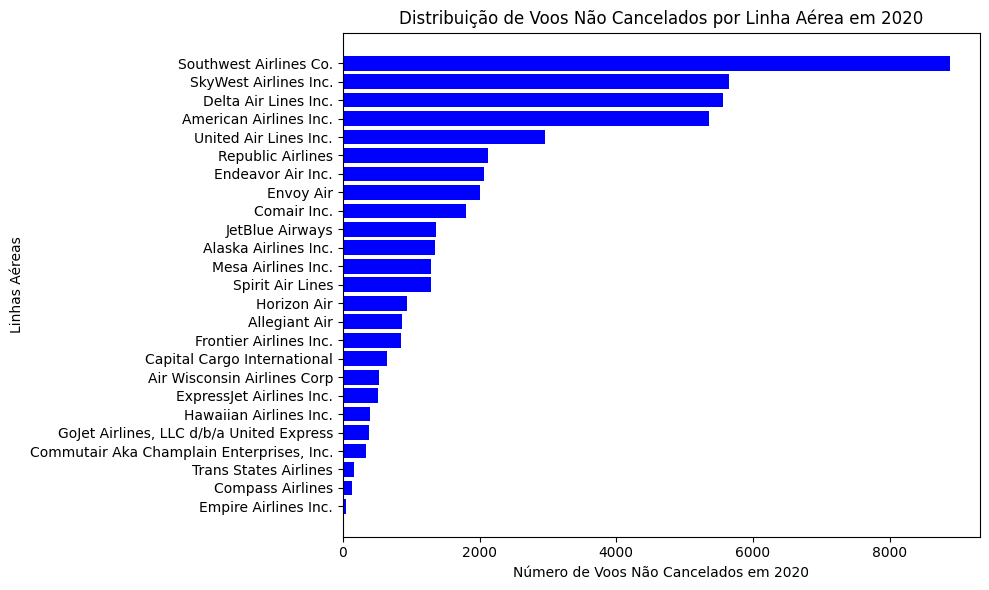

In [55]:
# Apenas os voos efetivos - COMPANHIAS AEREAS QUE MAIS VOARAM EM 2020
false_cancelled = flight_2020[flight_2020['Cancelled'] == False]['Airline'].value_counts()
false_cancelled = false_cancelled .sort_values(ascending=True)
plt.figure(figsize=(10, 6))
plt.barh(false_cancelled.index, false_cancelled.values, color='blue')
plt.xlabel('Número de Voos Não Cancelados em 2020')
plt.ylabel('Linhas Aéreas')
plt.title('Distribuição de Voos Não Cancelados por Linha Aérea em 2020')
plt.tight_layout()
plt.show()

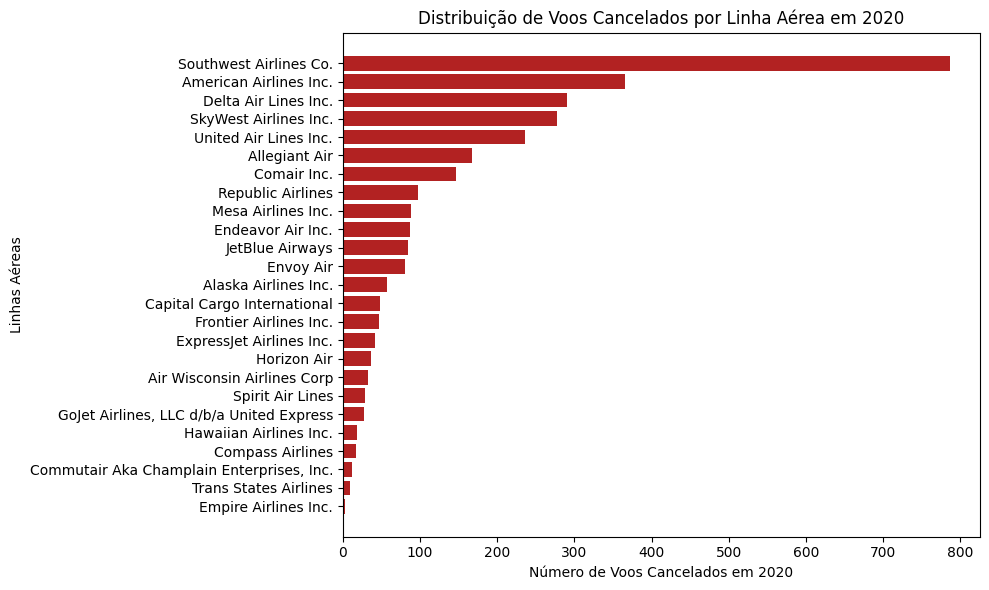

In [56]:
# Voos cancelados - companhias aéreas que mais mais cancelaram em 2020
true_cancelled = flight_2020[flight_2020['Cancelled'] == True]['Airline'].value_counts()
true_cancelled = true_cancelled.sort_values(ascending=True)
plt.figure(figsize=(10, 6))
plt.barh(true_cancelled.index, true_cancelled.values, color='firebrick')
plt.xlabel('Número de Voos Cancelados em 2020')
plt.ylabel('Linhas Aéreas')
plt.title('Distribuição de Voos Cancelados por Linha Aérea em 2020')
plt.tight_layout()
plt.show()

### Alterados

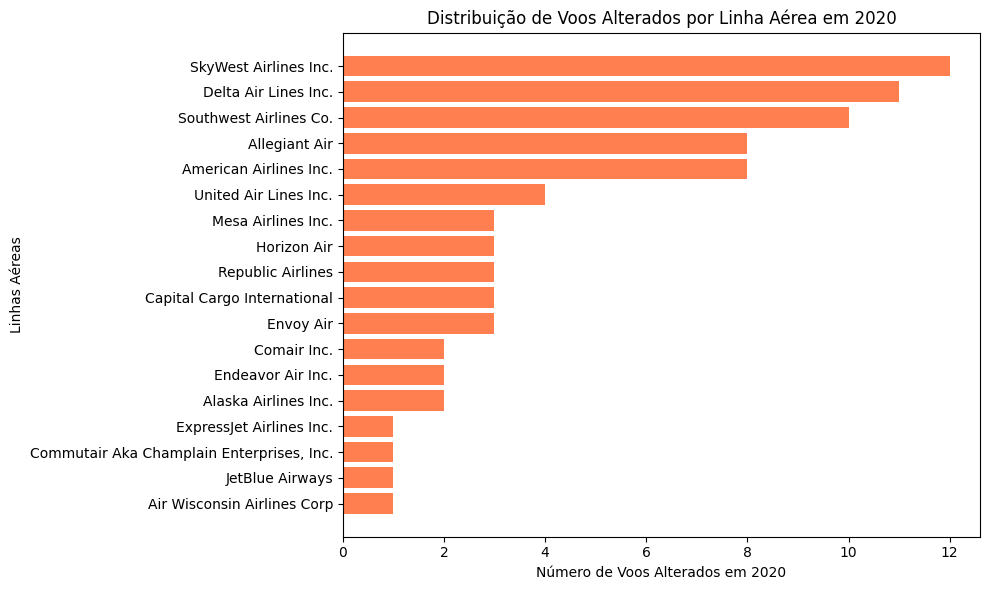

VOOS ALTERADOS
Airline
SkyWest Airlines Inc.                        12
Delta Air Lines Inc.                         11
Southwest Airlines Co.                       10
Allegiant Air                                 8
American Airlines Inc.                        8
United Air Lines Inc.                         4
Horizon Air                                   3
Mesa Airlines Inc.                            3
Republic Airlines                             3
Capital Cargo International                   3
Envoy Air                                     3
Comair Inc.                                   2
Endeavor Air Inc.                             2
Alaska Airlines Inc.                          2
Commutair Aka Champlain Enterprises, Inc.     1
JetBlue Airways                               1
ExpressJet Airlines Inc.                      1
Air Wisconsin Airlines Corp                   1
Name: count, dtype: int64


In [57]:
# Apenas os voos efetivos - COMPANHIAS AEREAS QUE MAIS VOARAM EM 2020
diverted_true = flight_2020[flight_2020['Diverted'] == True]['Airline'].value_counts()
diverted_true = diverted_true .sort_values(ascending=True)
plt.figure(figsize=(10, 6))
plt.barh(diverted_true.index, diverted_true.values, color='coral')
plt.xlabel('Número de Voos Alterados em 2020')
plt.ylabel('Linhas Aéreas')
plt.title('Distribuição de Voos Alterados por Linha Aérea em 2020')
plt.tight_layout()
plt.show()

true_diverted = flight_2020[flight_2020['Diverted'] == True]['Airline'].value_counts()
print('VOOS ALTERADOS')
print(true_diverted)

### Rotas mais executadas

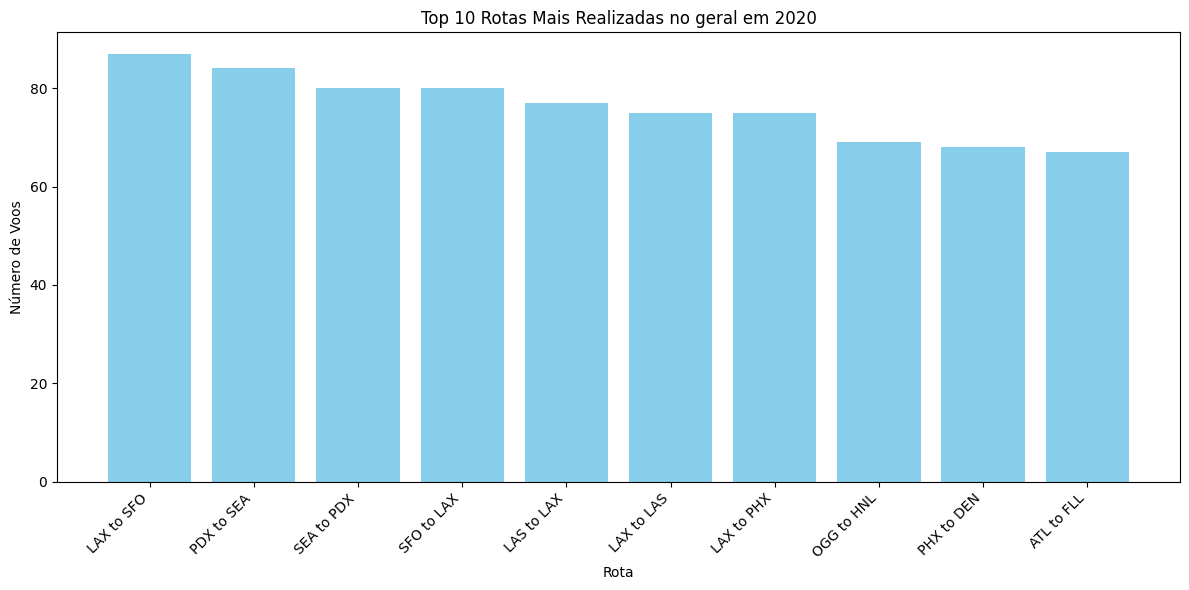

Route  Count
0     LAX to SFO     87
1     PDX to SEA     84
2     SEA to PDX     80
3     SFO to LAX     80
4     LAS to LAX     77
...          ...    ...
5397  PBG to IAG      1
5398  EAT to YKM      1
5399  PUW to ALW      1
5400  OKC to ICT      1
5401  IAD to MYR      1

[5402 rows x 2 columns]

In [58]:
flight_2020['Route'] = flight_2020['Origin'] + ' to ' + flight_2020['Dest']
flight_2018_nao_cancelados = flight_2020[flight_2020['Cancelled'] == False]
count_route = flight_2020['Route'].value_counts().reset_index()
count_route.columns = ['Route', 'Count']
plt.figure(figsize=(12, 6))
plt.bar(count_route['Route'][:10], count_route['Count'][:10], color='skyblue')
plt.xlabel('Rota')
plt.ylabel('Número de Voos')
plt.title('Top 10 Rotas Mais Realizadas no geral em 2020')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

count_route

### Considerações do Flight_2020

* Ranking das 10 companhias que mais voaram em 2020



```
Southwest Airlines Co.                       8875
SkyWest Airlines Inc.                        5653
Delta Air Lines Inc.                         5554
American Airlines Inc.                       5357
United Air Lines Inc.                        2954
Republic Airlines                            2117
Endeavor Air Inc.                            2070
Envoy Air                                    2004
Comair Inc.                                  1808
JetBlue Airways                              1363
```




Se comparado o desempenho de voos efetivos de 2020 (inicio da pandemia) com a os dados de 2019 (dados que tiverem melhor desempenho do que os de 2018), é notória a afetação:

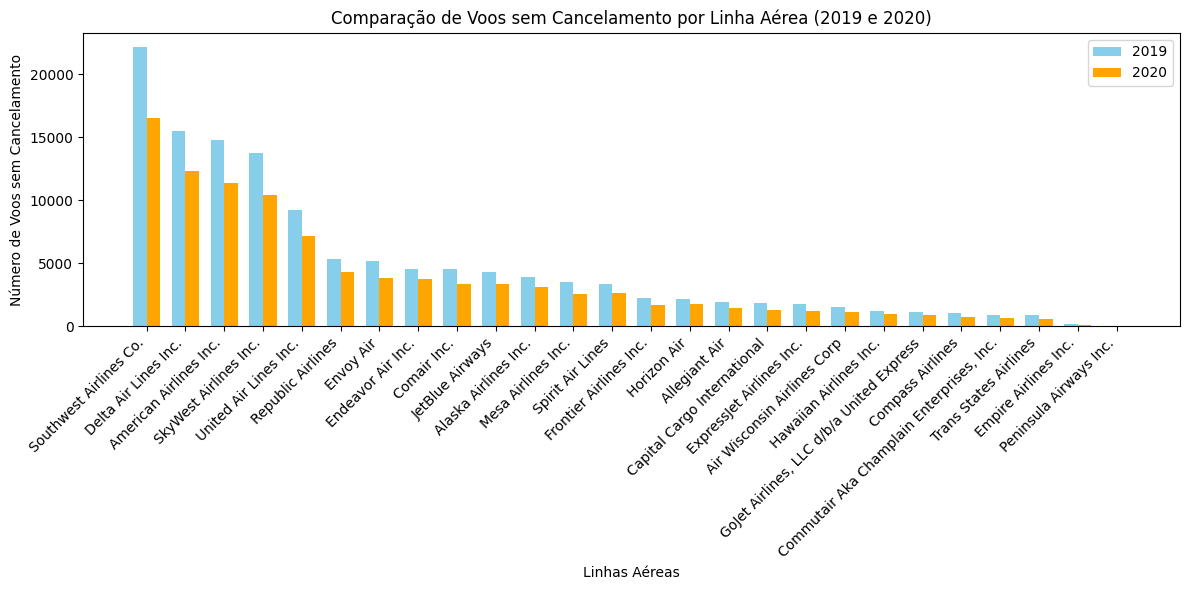

In [59]:

# Unindo os datasets de 2019 e 2020 para comparar o cancelamento
df_concat = pd.concat([flight_2019[['Cancelled', 'Airline']], flight_2020[['Cancelled', 'Airline']]])
df_cancel = df_concat[df_concat['Cancelled'] == False]
df_cancel_2019 = df_cancel[df_cancel.index.isin(flight_2019.index)]
df_cancel_2020 = df_cancel[df_cancel.index.isin(flight_2020.index)]
group_airline2019 = df_cancel_2019.groupby('Airline').size().reset_index(name='contagem_2019')
group_airline2020 = df_cancel_2020.groupby('Airline').size().reset_index(name='contagem_2020')

complete_count = pd.merge(group_airline2019, group_airline2020, on='Airline', how='outer').fillna(0)

complete_count['contagem_total'] = complete_count['contagem_2019'] + complete_count['contagem_2020']
complete_count = complete_count.sort_values(by='contagem_total', ascending=False)
plt.figure(figsize=(12, 6))

bar_width = 0.35
index = range(len(complete_count))

plt.bar(index, complete_count['contagem_2019'], width=bar_width, label='2019', color='skyblue')
plt.bar([i + bar_width for i in index], complete_count['contagem_2020'], width=bar_width, label='2020', color='orange')

plt.xlabel('Linhas Aéreas')
plt.ylabel('Número de Voos sem Cancelamento')
plt.title('Comparação de Voos sem Cancelamento por Linha Aérea (2019 e 2020)')
plt.xticks([i + bar_width/2 for i in index], complete_count['Airline'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

No gráfico é possivel observar o grande impacto que as companhias tiveram no ano de 2020

### **2021**

In [60]:
flight_2021 = pd.read_csv('Sample_combined_flights_2021.csv')
flight_2021

Unnamed: 0  FlightDate                                    Airline  \
0               0  2021-03-03                      SkyWest Airlines Inc.   
1               1  2021-03-02                      SkyWest Airlines Inc.   
2               2  2021-03-02                      SkyWest Airlines Inc.   
3               3  2021-03-02                      SkyWest Airlines Inc.   
4               4  2021-03-08                      SkyWest Airlines Inc.   
...           ...         ...                                        ...   
63320       63320  2021-06-01  Commutair Aka Champlain Enterprises, Inc.   
63321       63321  2021-06-01                Air Wisconsin Airlines Corp   
63322       63322  2021-06-01                Air Wisconsin Airlines Corp   
63323       63323  2021-06-01                     Southwest Airlines Co.   
63324       63324  2021-06-01                     Southwest Airlines Co.   

      Origin Dest  Cancelled  Diverted  CRSDepTime  DepTime  DepDelayMinutes  \
0        LAX  PHX      False     False        1552   1601.0              9.0   
1        SLC  ORD      False     False        1150   1141.0              0.0   
2        LBB  DFW      False     False        1745   1736.0              0.0   
3        PHX  FAT      False     False         933    927.0              0.0   
4        ORD  MSP      False     False        1335   1329.0              0.0   
...      ...  ...        ...       ...         ...      ...              ...   
63320    SGF  IAH      False     False         635    632.0              0.0   
63321    CRW  ORD      False     False         700    658.0              0.0   
63322    PWM  IAD      False     False        1400   1350.0              0.0   
63323    BHM  DEN      False     False        1810   1840.0             30.0   
63324    BNA  MCO      False     False        1630   1628.0              0.0   

       ...  WheelsOff  WheelsOn  TaxiIn  CRSArrTime  ArrDelay  ArrDel15  \
0      ...     1650.0    1850.0    17.0        1815      52.0       1.0   
1      ...     1158.0    1530.0    14.0        1549      -5.0       0.0   
2      ...     1748.0    1834.0    11.0        1908     -23.0       0.0   
3      ...     1002.0    1023.0     5.0        1028       0.0       0.0   
4      ...     1344.0    1446.0     4.0        1507     -17.0       0.0   
...    ...        ...       ...     ...         ...       ...       ...   
63320  ...      646.0     816.0     9.0         840     -15.0       0.0   
63321  ...      713.0     719.0     9.0         745     -17.0       0.0   
63322  ...     1407.0    1535.0     7.0        1554     -12.0       0.0   
63323  ...     1851.0    2026.0     9.0        2015      20.0       1.0   
63324  ...     1637.0    1900.0     7.0        1920     -13.0       0.0   

       ArrivalDelayGroups  ArrTimeBlk  DistanceGroup  DivAirportLandings  
0                     3.0   1800-1859              2                 0.0  
1                    -1.0   1500-1559              6                 0.0  
2                    -2.0   1900-1959              2                 0.0  
3                     0.0   1000-1059              2                 0.0  
4                    -2.0   1500-1559              2                 0.0  
...                   ...         ...            ...                 ...  
63320                -1.0   0800-0859              3                 0.0  
63321                -2.0   0700-0759              2                 0.0  
63322                -1.0   1500-1559              2                 0.0  
63323                 1.0   2000-2059              5                 0.0  
63324                -1.0   1900-1959              3                 0.0  

[63325 rows x 62 columns]

### Cancelados

In [61]:
false_cancelled = flight_2021[flight_2021['Cancelled'] == False]['Airline'].value_counts()
print('VOOS EFETIVOS')
print(false_cancelled)

print ('_____________________________________________________________________________________')

# voos de 2019 - Cancelados
true_cancelled = flight_2021[flight_2021['Cancelled'] == True]['Airline'].value_counts()
print('VOOS CANCELADOS')
print(true_cancelled)

VOOS EFETIVOS
Airline
Southwest Airlines Co.                       10442
Delta Air Lines Inc.                          7448
SkyWest Airlines Inc.                         7414
American Airlines Inc.                        7225
United Air Lines Inc.                         4436
Republic Airlines                             3255
Endeavor Air Inc.                             2778
Envoy Air                                     2421
Comair Inc.                                   2214
JetBlue Airways                               1978
Alaska Airlines Inc.                          1832
Spirit Air Lines                              1826
Mesa Airlines Inc.                            1599
Frontier Airlines Inc.                        1367
Allegiant Air                                 1171
Horizon Air                                   1080
Capital Cargo International                   1000
Air Wisconsin Airlines Corp                    823
Commutair Aka Champlain Enterprises, Inc.      768
Hawaiian 

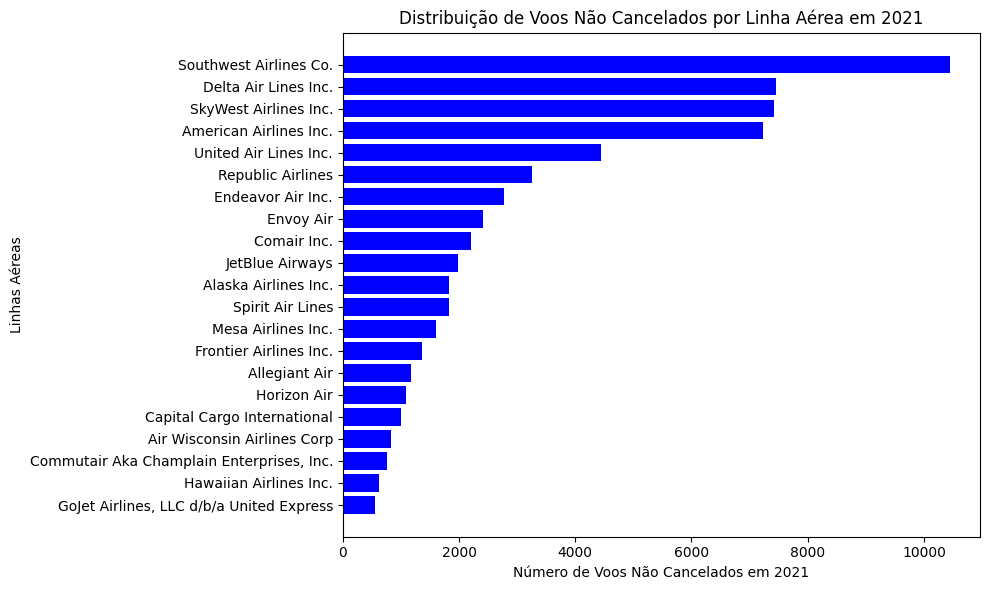

In [62]:
# Apenas os voos efetivos - COMPANHIAS AEREAS QUE MAIS VOARAM EM 2021
false_cancelled = flight_2021[flight_2021['Cancelled'] == False]['Airline'].value_counts()
false_cancelled = false_cancelled .sort_values(ascending=True)

plt.figure(figsize=(10, 6))

plt.barh(false_cancelled.index, false_cancelled.values, color='blue')

plt.xlabel('Número de Voos Não Cancelados em 2021')
plt.ylabel('Linhas Aéreas')
plt.title('Distribuição de Voos Não Cancelados por Linha Aérea em 2021')

plt.tight_layout()
plt.show()



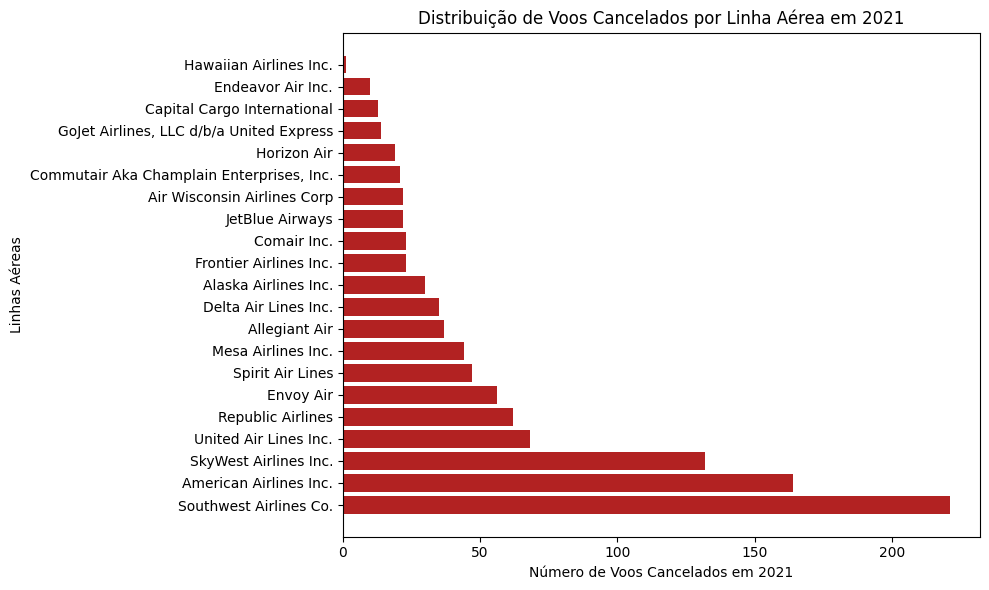

In [63]:
# Voos cancelados - companhias aéreas que mais mais cancelaram em 2021
true_cancelled_2021 = flight_2021[flight_2021['Cancelled'] == True]['Airline'].value_counts()
true_cancelled_2021 = true_cancelled.sort_values(ascending=True)
plt.figure(figsize=(10, 6))
plt.barh(true_cancelled.index, true_cancelled.values, color='firebrick')
plt.xlabel('Número de Voos Cancelados em 2021')
plt.ylabel('Linhas Aéreas')
plt.title('Distribuição de Voos Cancelados por Linha Aérea em 2021')
plt.tight_layout()
plt.show()

### Alterados

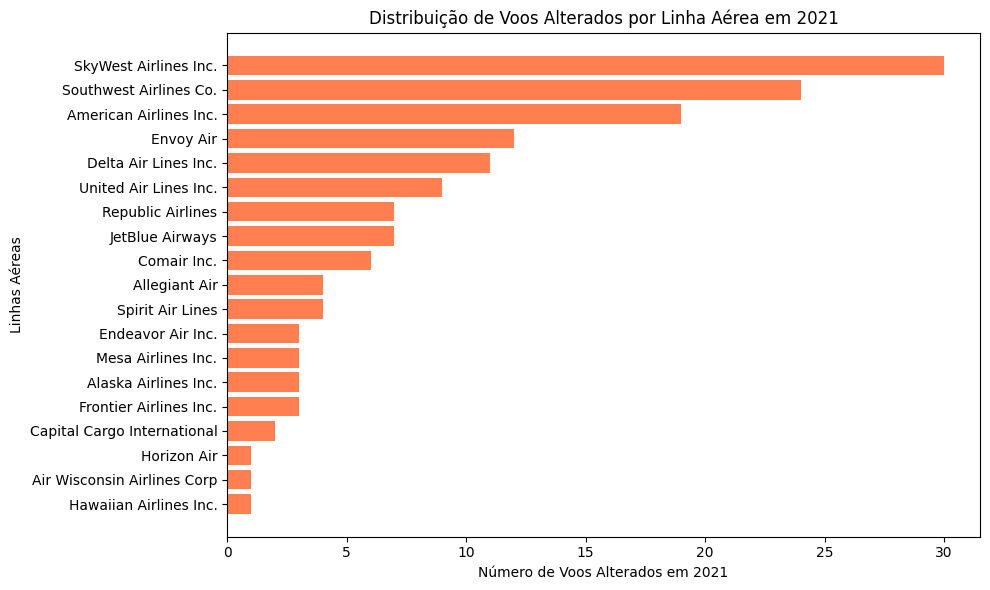

VOOS ALTERADOS
Airline
SkyWest Airlines Inc.          30
Southwest Airlines Co.         24
American Airlines Inc.         19
Envoy Air                      12
Delta Air Lines Inc.           11
United Air Lines Inc.           9
Republic Airlines               7
JetBlue Airways                 7
Comair Inc.                     6
Allegiant Air                   4
Spirit Air Lines                4
Endeavor Air Inc.               3
Mesa Airlines Inc.              3
Alaska Airlines Inc.            3
Frontier Airlines Inc.          3
Capital Cargo International     2
Air Wisconsin Airlines Corp     1
Horizon Air                     1
Hawaiian Airlines Inc.          1
Name: count, dtype: int64


In [64]:
# Apenas os voos efetivos - COMPANHIAS AEREAS QUE MAIS VOARAM EM 2021
diverted_true = flight_2021[flight_2021['Diverted'] == True]['Airline'].value_counts()
diverted_true = diverted_true .sort_values(ascending=True)
plt.figure(figsize=(10, 6))
plt.barh(diverted_true.index, diverted_true.values, color='coral')
plt.xlabel('Número de Voos Alterados em 2021')
plt.ylabel('Linhas Aéreas')
plt.title('Distribuição de Voos Alterados por Linha Aérea em 2021')
plt.tight_layout()
plt.show()

true_diverted = flight_2021[flight_2021['Diverted'] == True]['Airline'].value_counts()
print('VOOS ALTERADOS')
print(true_diverted)

### Rotas mais executadas

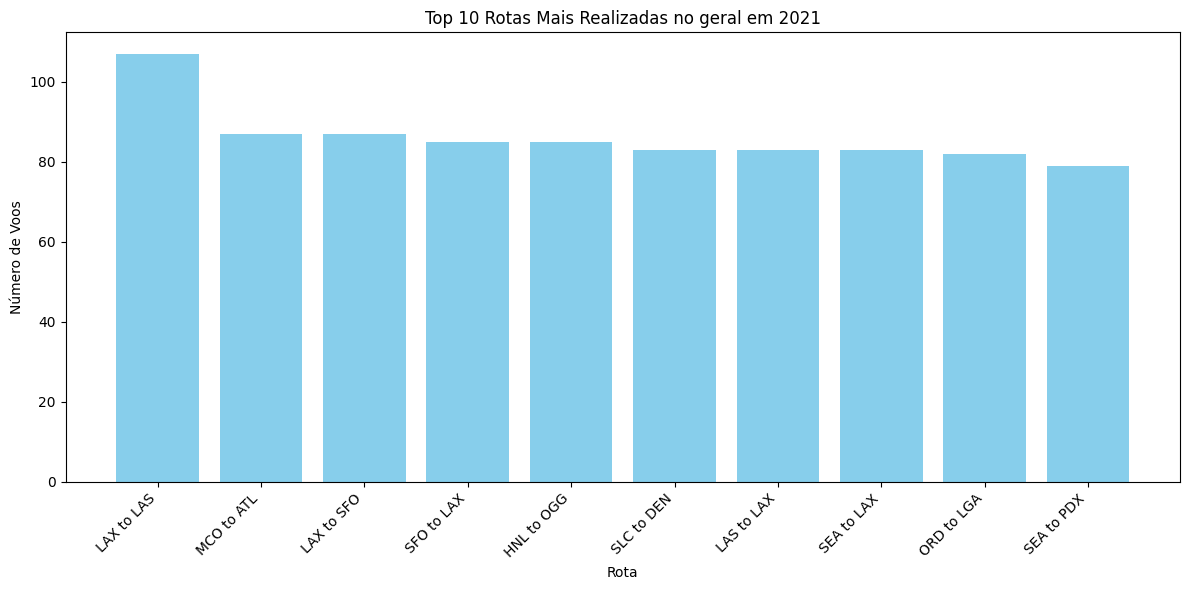

Route  Count
0     LAX to LAS    107
1     MCO to ATL     87
2     LAX to SFO     87
3     SFO to LAX     85
4     HNL to OGG     85
...          ...    ...
5824  DVL to DEN      1
5825  SUN to SFO      1
5826  SFO to JAC      1
5827  SAN to BZN      1
5828  PNS to CLE      1

[5829 rows x 2 columns]

In [65]:
flight_2021['Route'] = flight_2021['Origin'] + ' to ' + flight_2021['Dest']
flight_2021_nao_cancelados = flight_2021[flight_2021['Cancelled'] == False]
count_route = flight_2021['Route'].value_counts().reset_index()
count_route.columns = ['Route', 'Count']
plt.figure(figsize=(12, 6))
plt.bar(count_route['Route'][:10], count_route['Count'][:10], color='skyblue')
plt.xlabel('Rota')
plt.ylabel('Número de Voos')
plt.title('Top 10 Rotas Mais Realizadas no geral em 2021')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

count_route

### Considerações do Flight_2021

As 10 companhias que mais voaram em 2021:



```
Southwest Airlines Co.                       10442
Delta Air Lines Inc.                          7448
SkyWest Airlines Inc.                         7414
American Airlines Inc.                        7225
United Air Lines Inc.                         4436
Republic Airlines                             3255
Endeavor Air Inc.                             2778
Envoy Air                                     2421
Comair Inc.                                   2214
JetBlue Airways                               1978

```



## 2022

In [66]:
flight_2022 = pd.read_csv('Sample_combined_flights_2022.csv')
flight_2022

Unnamed: 0  FlightDate                                    Airline  \
0               0  2022-04-04                Air Wisconsin Airlines Corp   
1               1  2022-04-04                Air Wisconsin Airlines Corp   
2               2  2022-04-04                Air Wisconsin Airlines Corp   
3               3  2022-04-03   GoJet Airlines, LLC d/b/a United Express   
4               4  2022-04-03  Commutair Aka Champlain Enterprises, Inc.   
...           ...         ...                                        ...   
40418       40418  2022-03-29                          Republic Airlines   
40419       40419  2022-03-30                          Republic Airlines   
40420       40420  2022-03-30                          Republic Airlines   
40421       40421  2022-03-12                          Republic Airlines   
40422       40422  2022-03-30                          Republic Airlines   

      Origin Dest  Cancelled  Diverted  CRSDepTime  DepTime  DepDelayMinutes  \
0        ORD  DLH      False     False         857    848.0              0.0   
1        ORD  SDF      False     False        1450   1439.0              0.0   
2        ORD  CHO      False     False        1400   1355.0              0.0   
3        MDT  ORD      False     False        1741   1731.0              0.0   
4        IAH  JAN      False     False        2003   2154.0            111.0   
...      ...  ...        ...       ...         ...      ...              ...   
40418    IND  EWR      False     False         735    732.0              0.0   
40419    CLT  EWR      False     False         600    557.0              0.0   
40420    DTW  EWR      False     False        1932   1926.0              0.0   
40421    BNA  ORD      False     False        1033   1346.0            193.0   
40422    PVD  EWR      False     False        1413   1447.0             34.0   

       ...  WheelsOff  WheelsOn  TaxiIn  CRSArrTime  ArrDelay  ArrDel15  \
0      ...      911.0    1020.0     2.0        1035     -13.0       0.0   
1      ...     1453.0    1639.0    11.0        1718     -28.0       0.0   
2      ...     1416.0    1635.0     3.0        1656     -18.0       0.0   
3      ...     1742.0    1827.0     9.0        1849     -13.0       0.0   
4      ...     2208.0    2308.0     7.0        2126     109.0       1.0   
...    ...        ...       ...     ...         ...       ...       ...   
40418  ...      746.0     911.0    31.0         939       3.0       0.0   
40419  ...      611.0     747.0     9.0         757      -1.0       0.0   
40420  ...     1937.0    2048.0    60.0        2129      19.0       1.0   
40421  ...     1419.0    1534.0     7.0        1227     194.0       1.0   
40422  ...     1459.0    1547.0     9.0        1532      24.0       1.0   

       ArrivalDelayGroups  ArrTimeBlk  DistanceGroup  DivAirportLandings  
0                    -1.0   1000-1059              2                   0  
1                    -2.0   1700-1759              2                   0  
2                    -2.0   1600-1659              3                   0  
3                    -1.0   1800-1859              3                   0  
4                     7.0   2100-2159              2                   0  
...                   ...         ...            ...                 ...  
40418                 0.0   0900-0959              3                   0  
40419                -1.0   0700-0759              3                   0  
40420                 1.0   2100-2159              2                   0  
40421                12.0   1200-1259              2                   0  
40422                 1.0   1500-1559              1                   0  

[40423 rows x 62 columns]

### Cancelados

In [67]:
false_cancelled = flight_2022[flight_2022['Cancelled'] == False]['Airline'].value_counts()
print('VOOS EFETIVOS')
print(false_cancelled)

print ('_____________________________________________________________________________________')

# voos de 2022 - Cancelados
true_cancelled = flight_2022[flight_2022['Cancelled'] == True]['Airline'].value_counts()
print('VOOS CANCELADOS')
print(true_cancelled)

VOOS EFETIVOS
Airline
Southwest Airlines Co.                       7106
Delta Air Lines Inc.                         5101
American Airlines Inc.                       4754
SkyWest Airlines Inc.                        4226
United Air Lines Inc.                        3307
Republic Airlines                            1916
JetBlue Airways                              1435
Envoy Air                                    1379
Comair Inc.                                  1364
Endeavor Air Inc.                            1320
Alaska Airlines Inc.                         1274
Spirit Air Lines                             1249
Frontier Airlines Inc.                        862
Mesa Airlines Inc.                            713
Allegiant Air                                 652
Horizon Air                                   548
Capital Cargo International                   501
Commutair Aka Champlain Enterprises, Inc.     433
Hawaiian Airlines Inc.                        386
Air Wisconsin Airlines Corp 

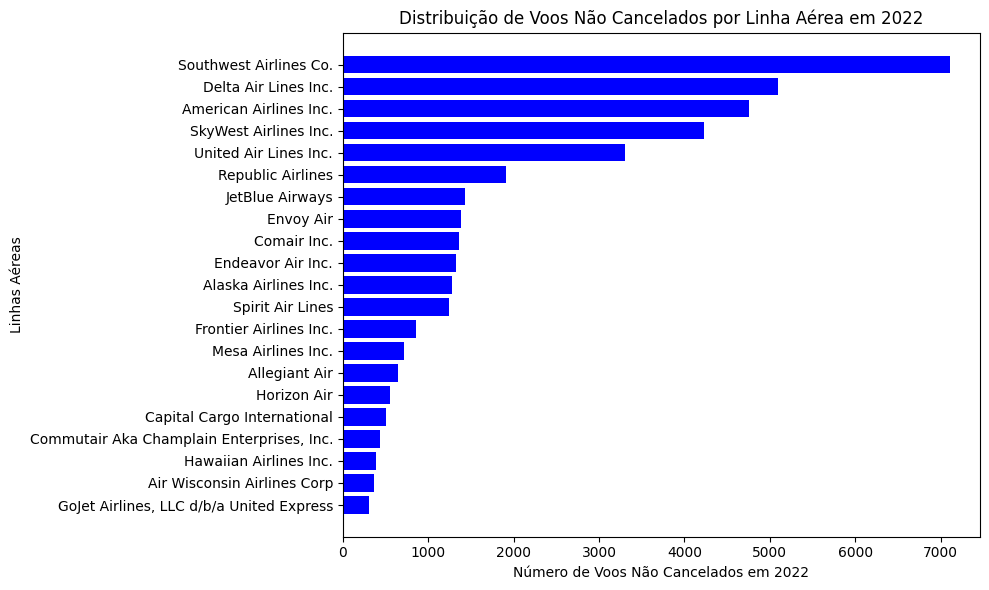

In [68]:
# Apenas os voos efetivos - COMPANHIAS AEREAS QUE MAIS VOARAM EM 2022
false_cancelled = flight_2022[flight_2022['Cancelled'] == False]['Airline'].value_counts()
false_cancelled = false_cancelled .sort_values(ascending=True)
plt.figure(figsize=(10, 6))
plt.barh(false_cancelled.index, false_cancelled.values, color='blue')
plt.xlabel('Número de Voos Não Cancelados em 2022')
plt.ylabel('Linhas Aéreas')
plt.title('Distribuição de Voos Não Cancelados por Linha Aérea em 2022')
plt.tight_layout()
plt.show()



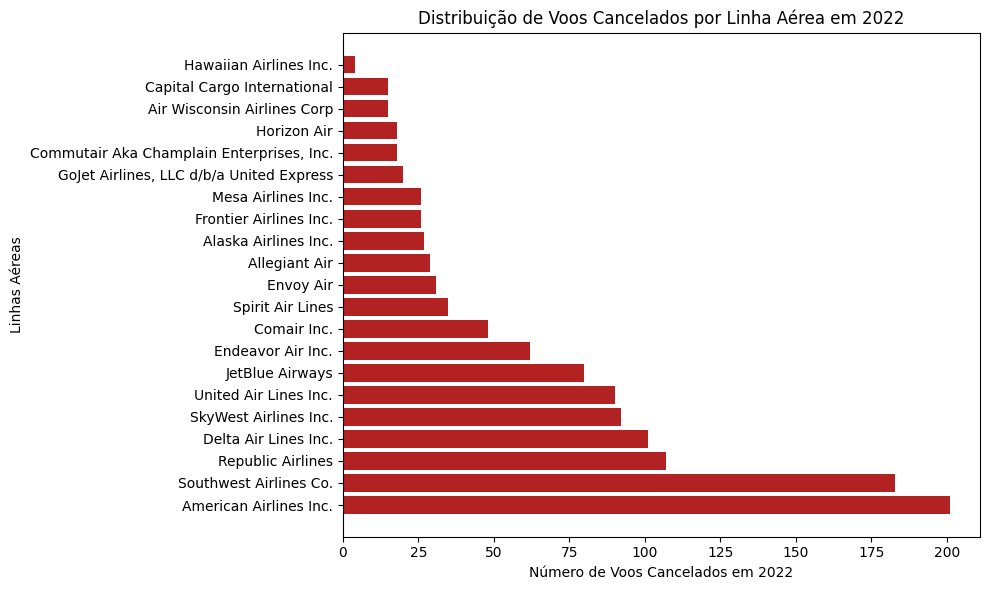

In [69]:
# Voos cancelados - companhias aéreas que mais mais cancelaram em 2022
true_cancelled_2022 = flight_2022[flight_2022['Cancelled'] == True]['Airline'].value_counts()
true_cancelled_2022 = true_cancelled.sort_values(ascending=True)
plt.figure(figsize=(10, 6))
plt.barh(true_cancelled.index, true_cancelled.values, color='firebrick')
plt.xlabel('Número de Voos Cancelados em 2022')
plt.ylabel('Linhas Aéreas')
plt.title('Distribuição de Voos Cancelados por Linha Aérea em 2022')
plt.tight_layout()
plt.show()

### Alterados

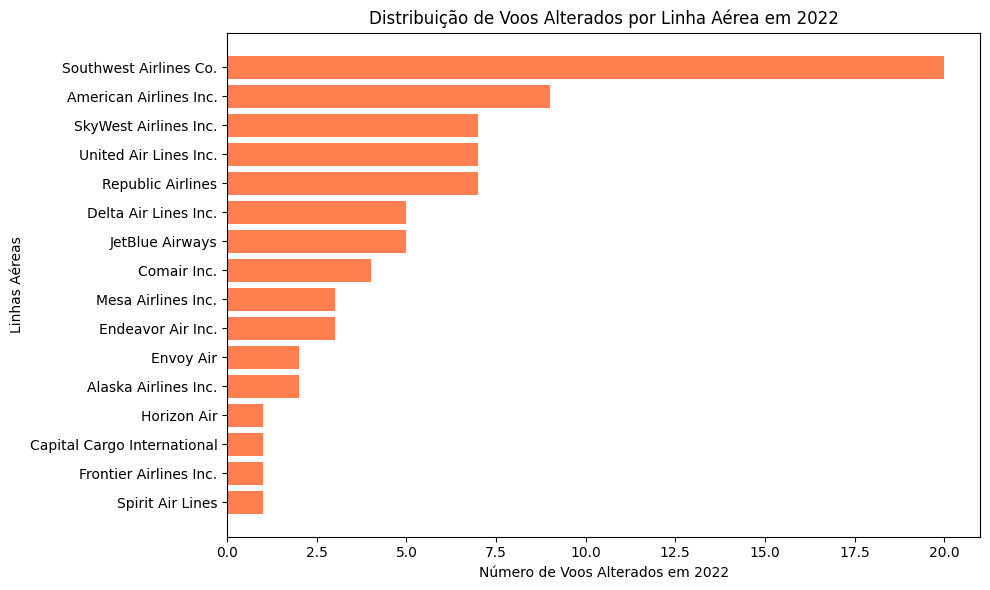

VOOS ALTERADOS
Airline
Southwest Airlines Co.         20
American Airlines Inc.          9
Republic Airlines               7
United Air Lines Inc.           7
SkyWest Airlines Inc.           7
JetBlue Airways                 5
Delta Air Lines Inc.            5
Comair Inc.                     4
Endeavor Air Inc.               3
Mesa Airlines Inc.              3
Alaska Airlines Inc.            2
Envoy Air                       2
Spirit Air Lines                1
Frontier Airlines Inc.          1
Capital Cargo International     1
Horizon Air                     1
Name: count, dtype: int64


In [70]:
# Apenas os voos efetivos - COMPANHIAS AEREAS QUE MAIS VOARAM EM 2022
diverted_true = flight_2022[flight_2022['Diverted'] == True]['Airline'].value_counts()
diverted_true = diverted_true .sort_values(ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(diverted_true.index, diverted_true.values, color='coral')
plt.xlabel('Número de Voos Alterados em 2022')
plt.ylabel('Linhas Aéreas')
plt.title('Distribuição de Voos Alterados por Linha Aérea em 2022')
plt.tight_layout()
plt.show()

true_diverted = flight_2022[flight_2022['Diverted'] == True]['Airline'].value_counts()
print('VOOS ALTERADOS')
print(true_diverted)

### Rotas mais executadas




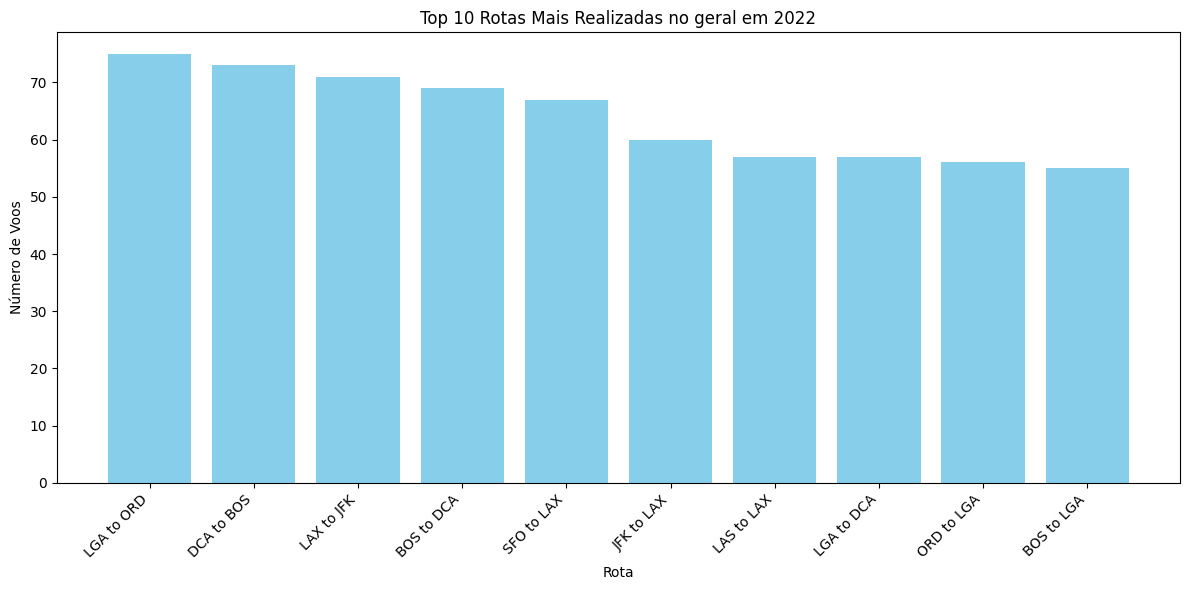

Route  Count
0     LGA to ORD     75
1     DCA to BOS     73
2     LAX to JFK     71
3     BOS to DCA     69
4     SFO to LAX     67
...          ...    ...
5331  BFF to LBF      1
5332  SHR to DEN      1
5333  PBI to DTW      1
5334  DDC to LBL      1
5335  DCA to EYW      1

[5336 rows x 2 columns]

In [71]:
flight_2022['Route'] = flight_2022['Origin'] + ' to ' + flight_2022['Dest']
flight_2022_nao_cancelados = flight_2022[flight_2022['Cancelled'] == False]
count_route = flight_2022['Route'].value_counts().reset_index()
count_route.columns = ['Route', 'Count']
plt.figure(figsize=(12, 6))
plt.bar(count_route['Route'][:10], count_route['Count'][:10], color='skyblue')
plt.xlabel('Rota')
plt.ylabel('Número de Voos')
plt.title('Top 10 Rotas Mais Realizadas no geral em 2022')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

count_route

### Considerações do Flight_2022

As 10 companhias que mais voaram em 2022:



```
Southwest Airlines Co.                       7106
Delta Air Lines Inc.                         5101
American Airlines Inc.                       4754
SkyWest Airlines Inc.                        4226
United Air Lines Inc.                        3307
Republic Airlines                            1916
JetBlue Airways                              1435
Envoy Air                                    1379
Comair Inc.                                  1364
Endeavor Air Inc.                            1320

```



# **<font color='MediumBlue'>Parte 1:</font>** Análise de Companhias Aéreas


In [72]:
# juntar os dataframes
dataframes = [flight_2018, flight_2019, flight_2020, flight_2021, flight_2022]
df_geral = pd.concat(dataframes, ignore_index=True)
df_geral
#reduzindo o numero de colunas

columns_subset = [
    "Year",
    "Month",
    "FlightDate",
    "Airline",
    "Origin",
    "Dest",
    "Cancelled",
    "Diverted",
    "AirTime",
    "CRSDepTime",
    "DepTime",
    "DepDelayMinutes",
    "Distance",
    "CRSArrTime",
    "ArrTime",
    "ArrDelayMinutes",
]

df = df_geral.loc[:, columns_subset]
df


Year  Month  FlightDate            Airline Origin Dest  Cancelled  \
0       2018      1  2018-01-05  Endeavor Air Inc.    ATL  ABY      False   
1       2018      1  2018-01-14  Endeavor Air Inc.    ATL  ABY      False   
2       2018      1  2018-01-04  Endeavor Air Inc.    EWN  ATL       True   
3       2018      1  2018-01-09  Endeavor Air Inc.    FAY  ATL      False   
4       2018      1  2018-01-15  Endeavor Air Inc.    CSG  ATL      False   
...      ...    ...         ...                ...    ...  ...        ...   
292106  2022      3  2022-03-29  Republic Airlines    IND  EWR      False   
292107  2022      3  2022-03-30  Republic Airlines    CLT  EWR      False   
292108  2022      3  2022-03-30  Republic Airlines    DTW  EWR      False   
292109  2022      3  2022-03-12  Republic Airlines    BNA  ORD      False   
292110  2022      3  2022-03-30  Republic Airlines    PVD  EWR      False   

        Diverted  AirTime  CRSDepTime  DepTime  DepDelayMinutes  Distance  \
0          False     29.0        1037   1032.0              0.0     145.0   
1          False     30.0        1037   1031.0              0.0     145.0   
2          False      NaN        1415      NaN              NaN     433.0   
3          False     64.0        1853   1850.0              0.0     331.0   
4          False     22.0         615    625.0             10.0      83.0   
...          ...      ...         ...      ...              ...       ...   
292106     False     85.0         735    732.0              0.0     645.0   
292107     False     96.0         600    557.0              0.0     529.0   
292108     False     71.0        1932   1926.0              0.0     488.0   
292109     False     75.0        1033   1346.0            193.0     409.0   
292110     False     48.0        1413   1447.0             34.0     160.0   

        CRSArrTime  ArrTime  ArrDelayMinutes  
0             1137   1124.0              0.0  
1             1137   1120.0              0.0  
2             1605      NaN              NaN  
3             2030   2021.0              0.0  
4              711    704.0              0.0  
...            ...      ...              ...  
292106         939    942.0              3.0  
292107         757    756.0              0.0  
292108        2129   2148.0             19.0  
292109        1227   1541.0            194.0  
292110        1532   1556.0             24.0  

[292111 rows x 16 columns]

In [73]:
df['Route'] = df['Origin'] + ' to ' + df['Dest']

### 1 -  Quais são as principais companhias aéreas que mais voaram durante cada ano?

In [74]:
df.Year.value_counts()

Year
2019    80973
2021    63325
2018    56826
2020    50564
2022    40423
Name: count, dtype: int64

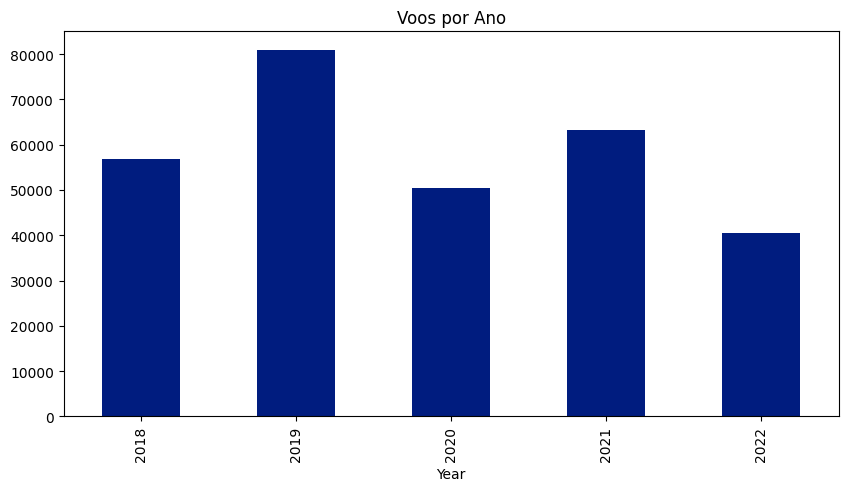

In [75]:
from datetime import datetime
df["FlightDate"] = pd.to_datetime(df["FlightDate"])
df["Year"] = df['FlightDate'].dt.year
df["Year"].value_counts().sort_index().plot(
    kind="bar", figsize=(10, 5), title="Voos por Ano"
)
plt.show()

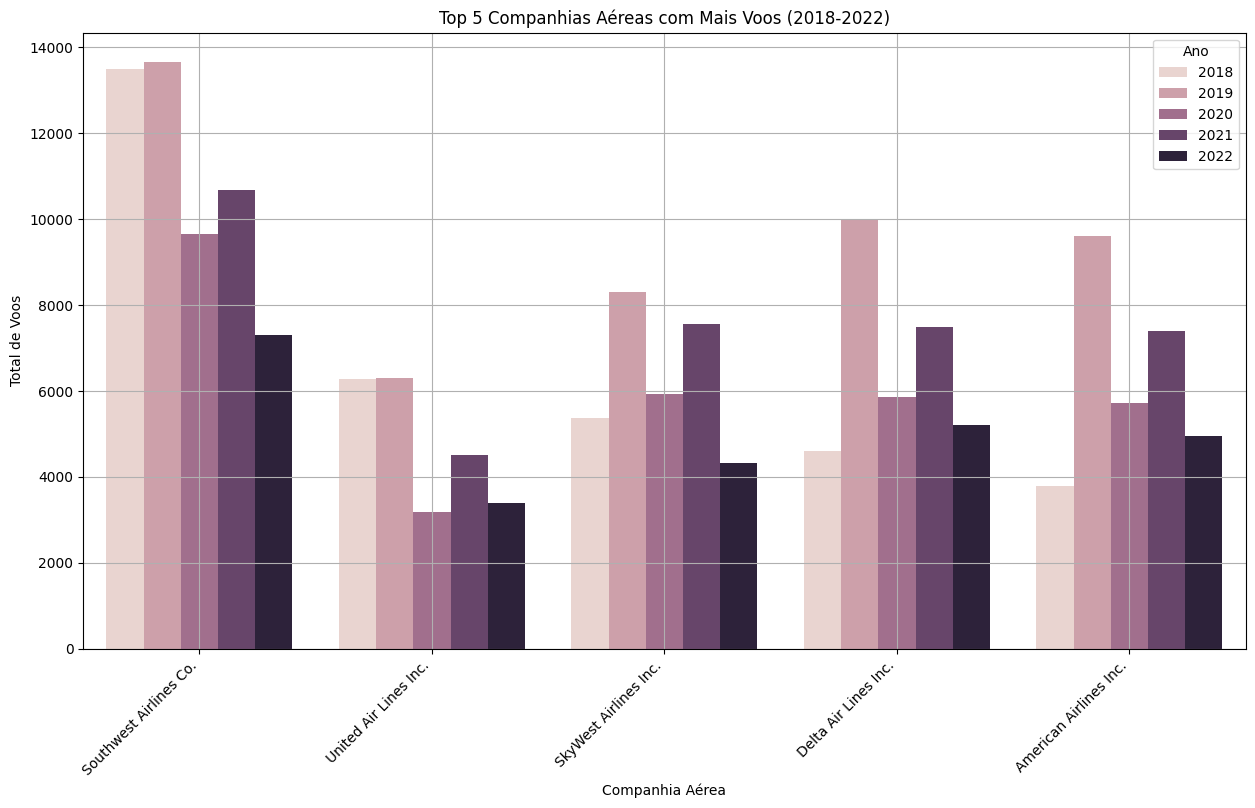

In [76]:
df['FlightDate'] = pd.to_datetime(df['FlightDate'])
df['Year'] = df['FlightDate'].dt.year
company_per_year = df.groupby(['Year', 'Airline'])['Airline'].count().reset_index(name='TotalVoos')
top5_company_per_year = company_per_year.groupby('Year').apply(lambda x: x.nlargest(5, 'TotalVoos')).reset_index(drop=True)
top5_companies_2018_2019_2020_2021_2022 = top5_company_per_year[top5_company_per_year['Year'].isin([2018, 2019, 2020, 2021, 2022])]
plt.figure(figsize=(15, 8))
sns.set_palette("bright")
sns.barplot(x='Airline', y='TotalVoos', hue='Year', data=top5_companies_2018_2019_2020_2021_2022)
plt.xlabel('Companhia Aérea')
plt.ylabel('Total de Voos')
plt.title('Top 5 Companhias Aéreas com Mais Voos (2018-2022)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Ano')
plt.grid(True)
plt.show()

In [77]:
# Contando valores por ano
counts_df1 = flight_2018[flight_2018['Cancelled'] == False].Airline.value_counts().reset_index()
counts_df2 = flight_2019[flight_2019['Cancelled'] == False].Airline.value_counts().reset_index()
counts_df3 = flight_2020[flight_2020['Cancelled'] == False].Airline.value_counts().reset_index()
counts_df4 = flight_2021[flight_2021['Cancelled'] == False].Airline.value_counts().reset_index()
counts_df5 = flight_2022[flight_2022['Cancelled'] == False].Airline.value_counts().reset_index()

counts_df1.columns = ['Airline', '2018']
counts_df2.columns = ['Airline', '2019']
counts_df3.columns = ['Airline', '2020']
counts_df4.columns = ['Airline', '2021']
counts_df5.columns = ['Airline', '2022']

dataframes = [counts_df1, counts_df2, counts_df3, counts_df4, counts_df5]
performance_per_year = pd.DataFrame()
for i, df1 in enumerate(dataframes, start=1):
    if i == 1:
        performance_per_year = df1
    else:
        performance_per_year = pd.merge(performance_per_year, df1, on='Airline', how='outer')

performance_per_year = performance_per_year.fillna(0)

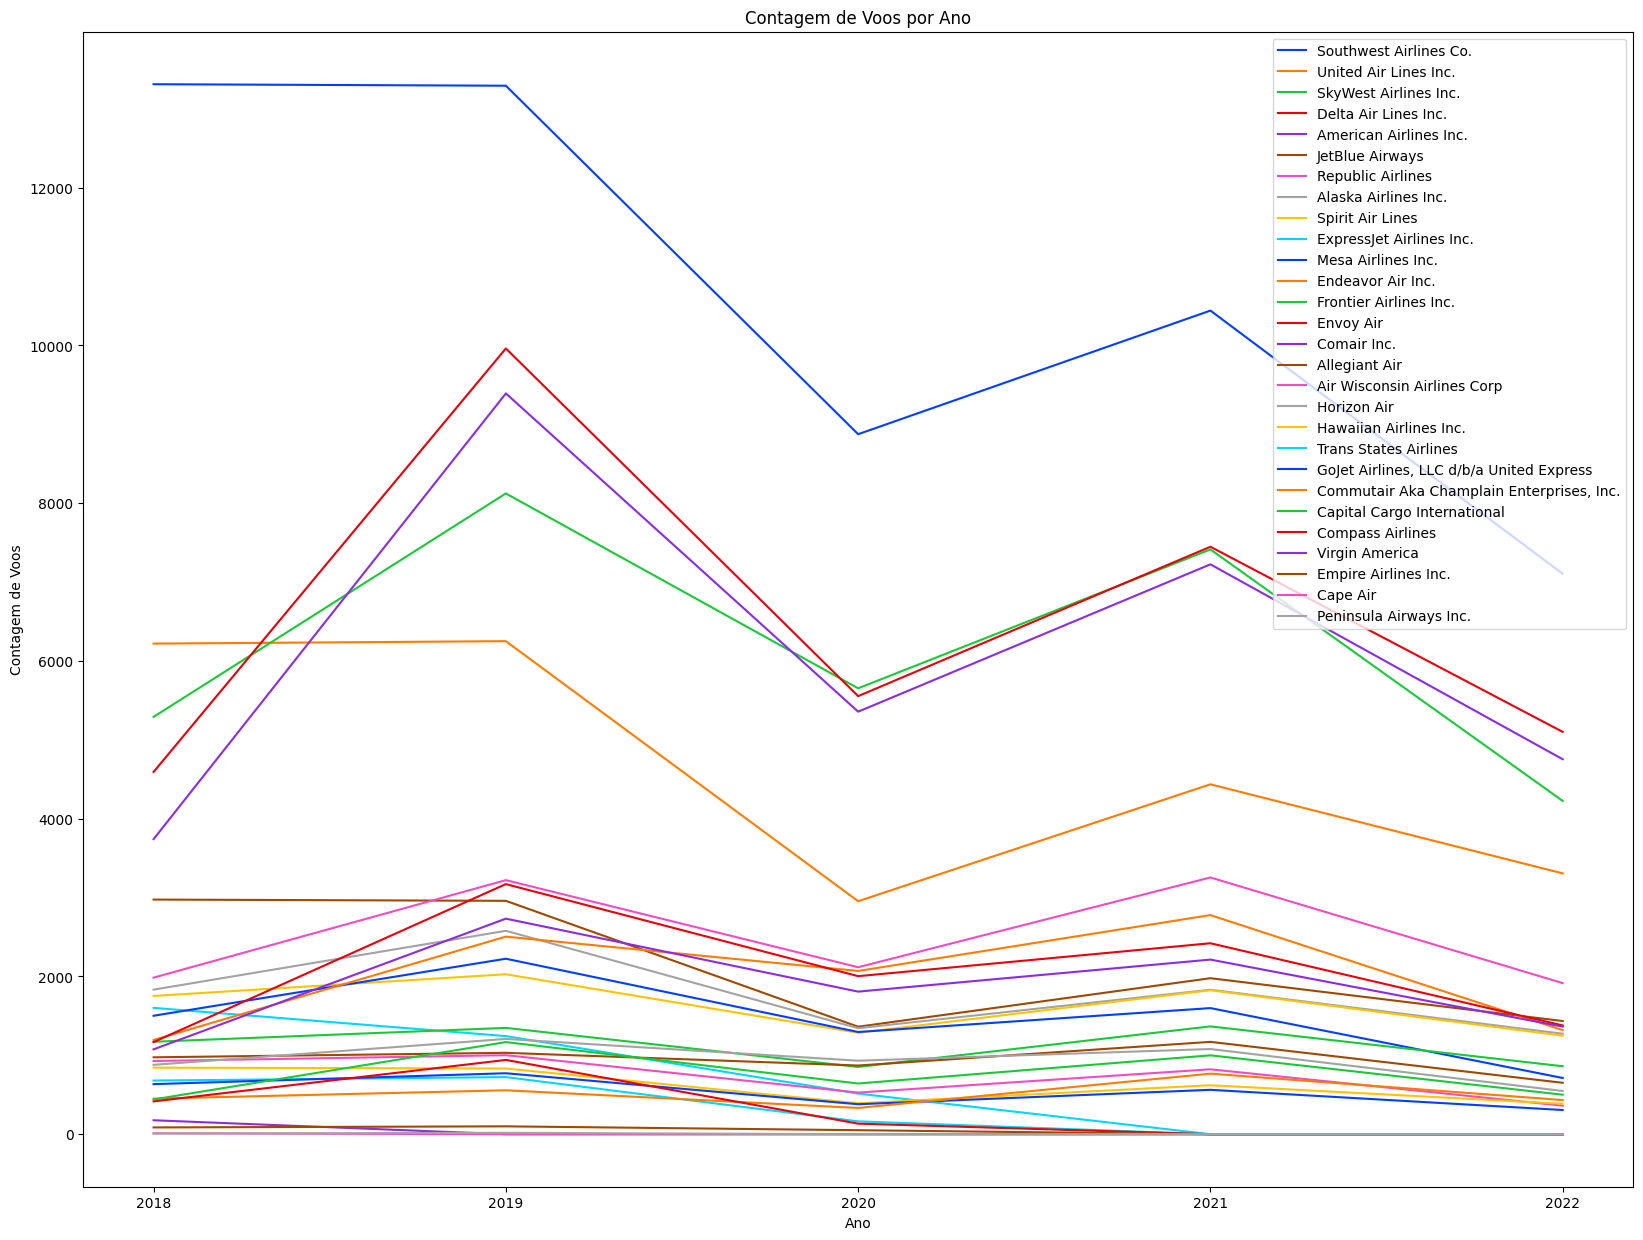

In [78]:
plt.figure(figsize=(20, 15))

for index, row in performance_per_year.iterrows():
    plt.plot(performance_per_year.columns[1:], row[1:], label=row['Airline'])

plt.legend()
plt.title('Contagem de Voos por Ano')
plt.xlabel('Ano')
plt.ylabel('Contagem de Voos')

plt.show()

obs: o ano de 2022 não está completo - vai até abril

### 2 - A pandemia afetou a operação de alguma delas? De que forma?

OBS: Segundo a OMS periodo Pandemico teve seu ínicio em 11 de março de 2020, mas a OMS deu o alerta em Dezembro de 2019, sendo o fim da PHEIC no dia 5 de maio de 2023. Para facilitar o estudo iremos considerar 2020 a 2022 como cenário pandemico.

* A afetação será colocada como grande quantitativo de cancelamentos e alterações. Considerando essas variáveis, nota-se os períodos de afetação pelo gráfico abaixo:

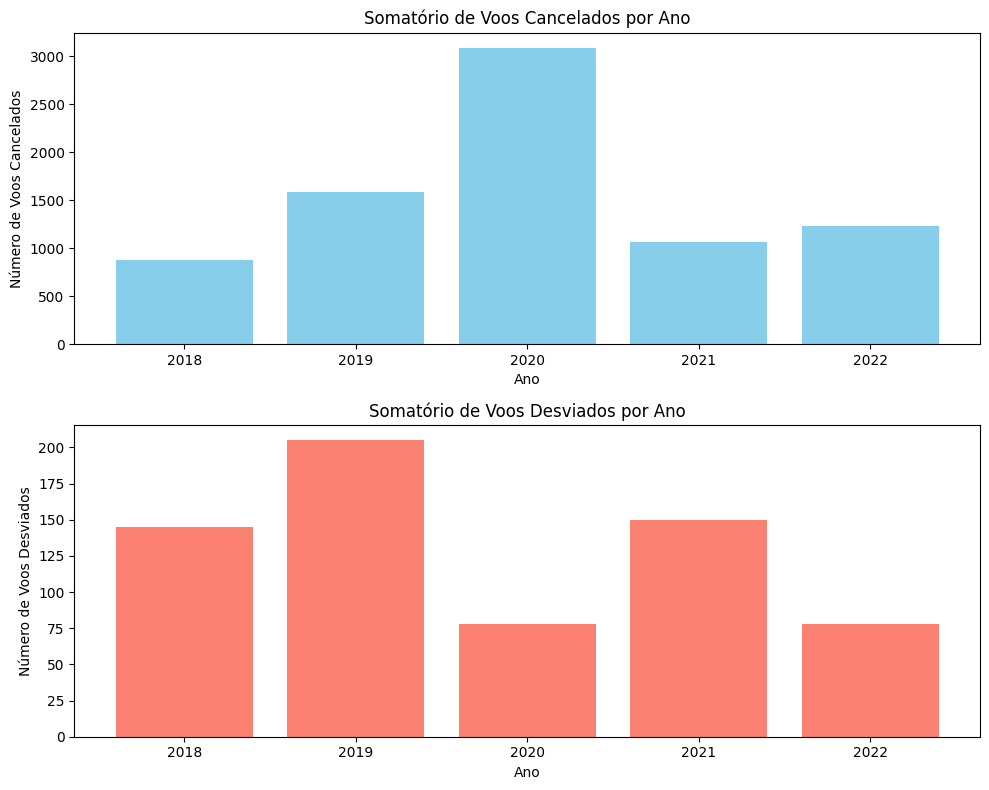

In [79]:
# Filtrar voos cancelados e desviados
cancelled_flights = df[df['Cancelled'] == True]
diverted_flights = df[df['Diverted'] == True]
cancelled_per_year = cancelled_flights.groupby('Year').size()
diverted_per_year = diverted_flights.groupby('Year').size()
fig, axs = plt.subplots(2, 1, figsize=(10, 8))
axs[0].bar(cancelled_per_year.index, cancelled_per_year, color='skyblue')
axs[0].set_title('Somatório de Voos Cancelados por Ano')
axs[0].set_xlabel('Ano')
axs[0].set_ylabel('Número de Voos Cancelados')
axs[1].bar(diverted_per_year.index, diverted_per_year, color='salmon')
axs[1].set_title('Somatório de Voos Desviados por Ano')
axs[1].set_xlabel('Ano')
axs[1].set_ylabel('Número de Voos Desviados')
plt.tight_layout()
plt.show()


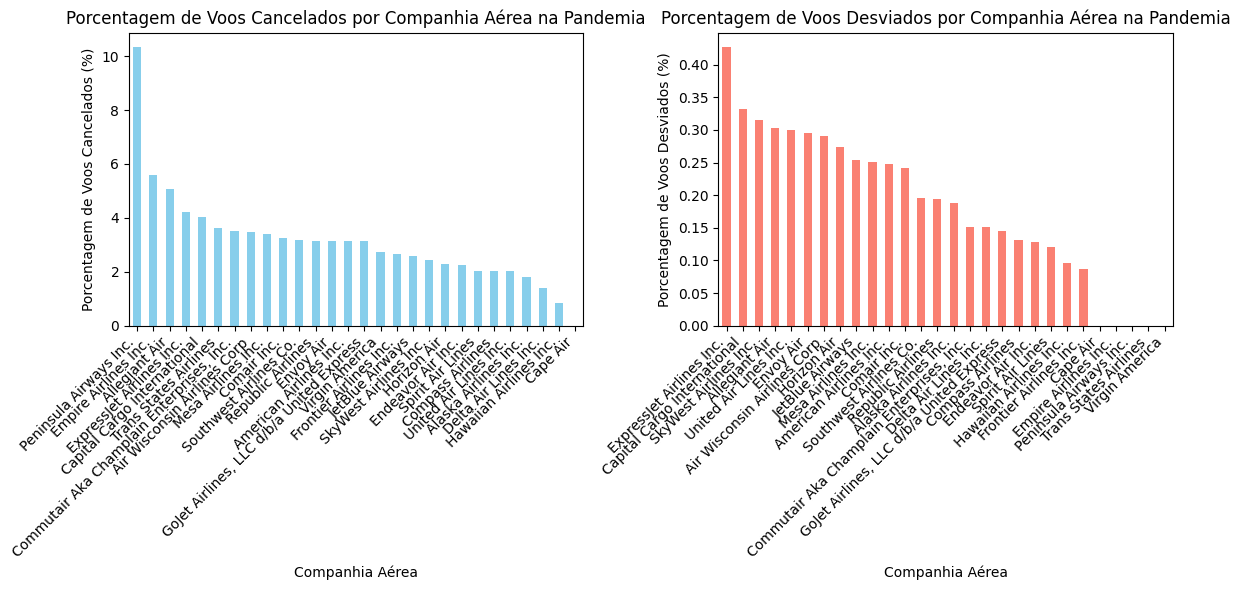

In [80]:
# Filtro pandemia:
df_periodo = df[(df['Year'] >= 2020) & (df['Year'] <= 2022)]

# 1º os CANCELADOS:
cancelled_flights = df[df['Cancelled'] == True]
total_voos_por_companhia = df.groupby('Airline').size()
cancelled_flights_por_companhia = cancelled_flights.groupby('Airline').size()
percent_company = (cancelled_flights_por_companhia / total_voos_por_companhia) * 100
percent_company = percent_company.sort_values(ascending=False)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
percent_company.plot(kind='bar', color='skyblue')
plt.xlabel('Companhia Aérea')
plt.ylabel('Porcentagem de Voos Cancelados (%)')
plt.title('Porcentagem de Voos Cancelados por Companhia Aérea na Pandemia')
plt.xticks(rotation=45, ha='right')


# 2º OS VOOS DESVIADOS

diverted_flights = df[df['Diverted'] == True]
diverted_flights_comp = diverted_flights.groupby('Airline').size()
diverted_percent_company = (diverted_flights_comp / total_voos_por_companhia) * 100
diverted_percent_company = diverted_percent_company.sort_values(ascending=False)
plt.subplot(1, 2, 2)
diverted_percent_company.plot(kind='bar', color='salmon')
plt.xlabel('Companhia Aérea')
plt.ylabel('Porcentagem de Voos Desviados (%)')
plt.title('Porcentagem de Voos Desviados por Companhia Aérea na Pandemia')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()



Se comparado o desempenho de voos efetivos de 2020 (inicio da pandemia) com a os dados de 2019 (dados que tiverem melhor desempenho do que os de 2018), é notória a afetação:

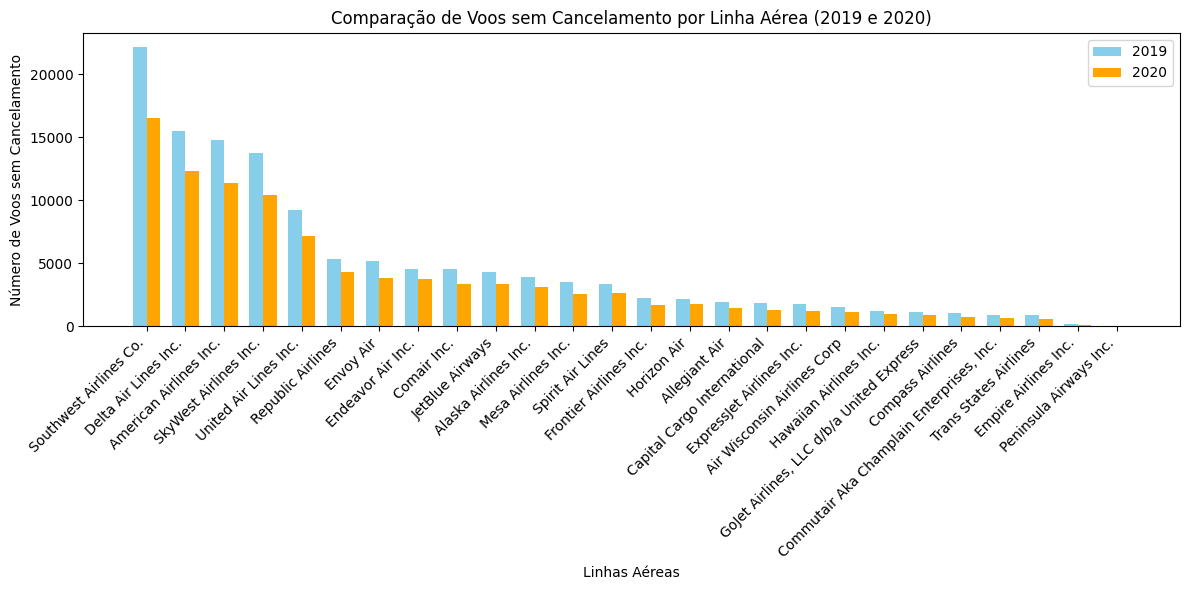

In [81]:
# Unindo os datasets de 2019 e 2020 para comparar o cancelamento
df_concat = pd.concat([flight_2019[['Cancelled', 'Airline']], flight_2020[['Cancelled', 'Airline']]])
df_cancel = df_concat[df_concat['Cancelled'] == False]
df_cancel_2019 = df_cancel[df_cancel.index.isin(flight_2019.index)]
df_cancel_2020 = df_cancel[df_cancel.index.isin(flight_2020.index)]
group_airline2019 = df_cancel_2019.groupby('Airline').size().reset_index(name='contagem_2019')
group_airline2020 = df_cancel_2020.groupby('Airline').size().reset_index(name='contagem_2020')

complete_count = pd.merge(group_airline2019, group_airline2020, on='Airline', how='outer').fillna(0)

complete_count['contagem_total'] = complete_count['contagem_2019'] + complete_count['contagem_2020']
complete_count = complete_count.sort_values(by='contagem_total', ascending=False)
plt.figure(figsize=(12, 6))

bar_width = 0.35
index = range(len(complete_count))

plt.bar(index, complete_count['contagem_2019'], width=bar_width, label='2019', color='skyblue')
plt.bar([i + bar_width for i in index], complete_count['contagem_2020'], width=bar_width, label='2020', color='orange')

plt.xlabel('Linhas Aéreas')
plt.ylabel('Número de Voos sem Cancelamento')
plt.title('Comparação de Voos sem Cancelamento por Linha Aérea (2019 e 2020)')
plt.xticks([i + bar_width/2 for i in index], complete_count['Airline'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

Conclusão:

* Parte do ano de 2019 a principalmente 2020 foram os momentos de maior cancelamento de voos, e  menor anteração.

* O covid-19 iniciou no final de 2019 e teve maior intensidade em 2020.


* O fato de 2018-2019 terem uma taxa de alterações grande e consideravél de cancelamentos também pode estar associado a relação que este foi o período com maior número de voos


### 3 - Quais as companhias que alteraram mais voos durante a pandemia?

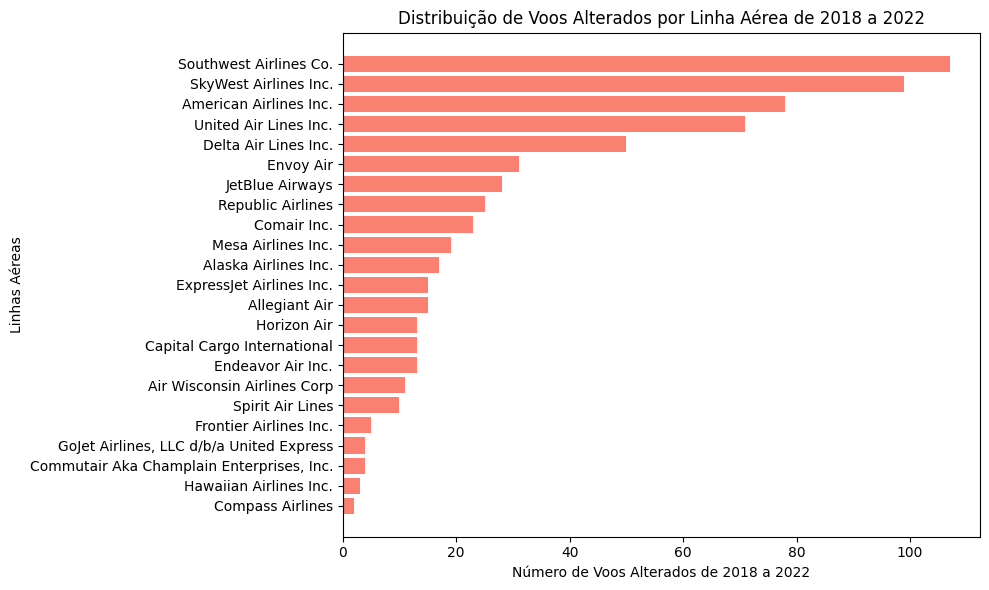

VOOS ALTERADOS
Airline
Southwest Airlines Co.                       107
SkyWest Airlines Inc.                         99
American Airlines Inc.                        78
United Air Lines Inc.                         71
Delta Air Lines Inc.                          50
Envoy Air                                     31
JetBlue Airways                               28
Republic Airlines                             25
Comair Inc.                                   23
Mesa Airlines Inc.                            19
Alaska Airlines Inc.                          17
ExpressJet Airlines Inc.                      15
Allegiant Air                                 15
Horizon Air                                   13
Capital Cargo International                   13
Endeavor Air Inc.                             13
Air Wisconsin Airlines Corp                   11
Spirit Air Lines                              10
Frontier Airlines Inc.                         5
GoJet Airlines, LLC d/b/a United Express      

In [82]:
# Apenas os voos efetivos - COMPANHIAS AEREAS QUE MAIS VOARAM EM 2022
diverted_true = df[df['Diverted'] == True]['Airline'].value_counts()
diverted_true = diverted_true .sort_values(ascending=True)

plt.figure(figsize=(10, 6))

plt.barh(diverted_true.index, diverted_true.values, color='salmon')

plt.xlabel('Número de Voos Alterados de 2018 a 2022')
plt.ylabel('Linhas Aéreas')
plt.title('Distribuição de Voos Alterados por Linha Aérea de 2018 a 2022')

plt.tight_layout()
plt.show()

true_diverted = df[df['Diverted'] == True]['Airline'].value_counts()
print('VOOS ALTERADOS')
print(true_diverted)

### 4 - Quais as principais rotas aéreas das principais companhias? A

In [83]:
cancel_percent = df.groupby('Airline')['Cancelled'].mean() * 100
company_per_year = df.groupby(['Year', 'Airline'])['Airline'].count().reset_index(name='TotalVoos')
top5_companies = cancel_percent.nlargest(5)

Principais Rotas:
- LAX - LAS: Los Angeles x Las Vegas
- LAX - PHX: Los Angeles x Phoenix
- LAS - LAX: Las Vegas x Los Angeles
- PHX - LAX: Phoenix x Los Angeles
- SFO - LAX: San Francisco x Los Angeles

C:\Users\hayan\AppData\Local\Temp\ipykernel_17340\4135486734.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=top5_rotas.values, y=[f"{origem} - {destino}" for origem, destino in top5_rotas.index], palette='viridis')


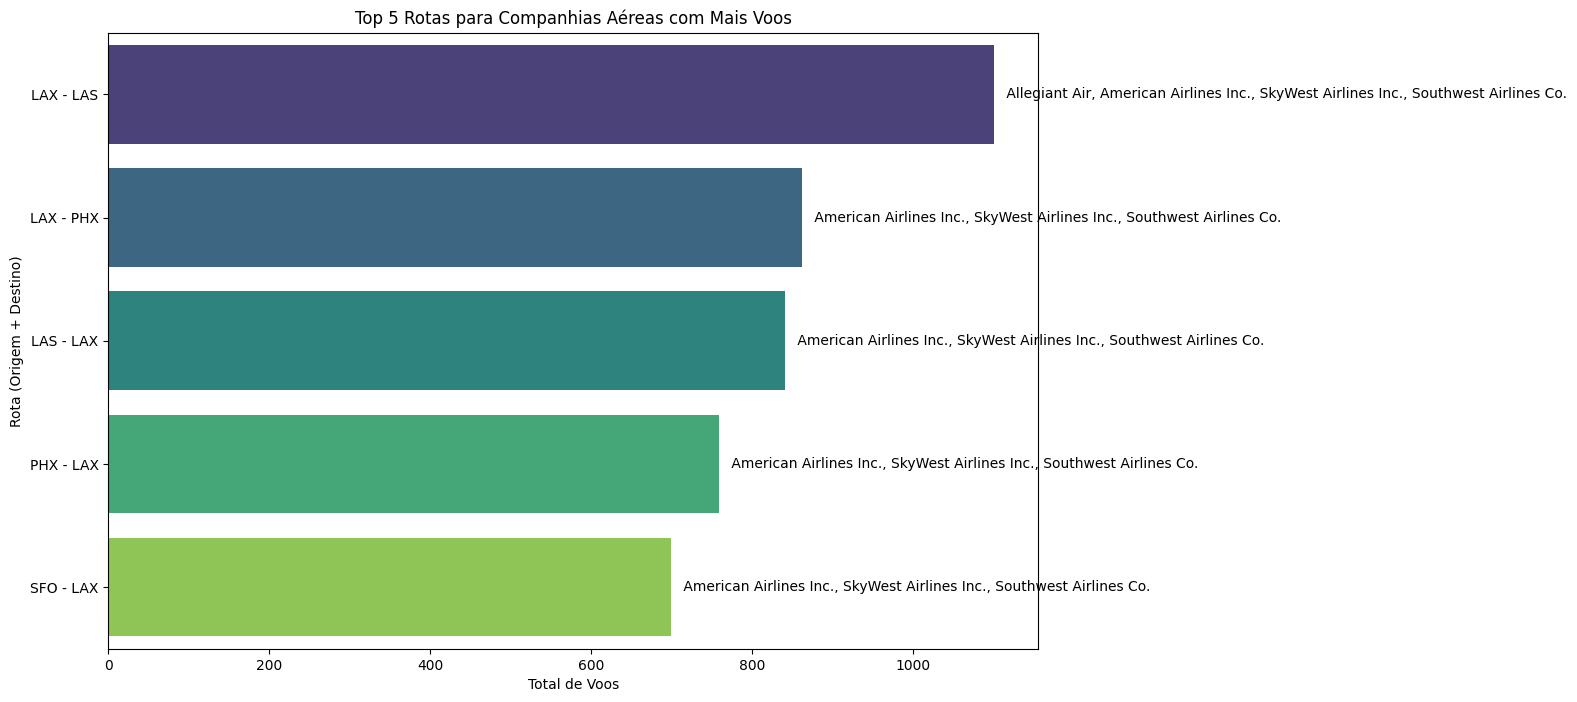

In [84]:
routes_by_company = df.groupby(['Airline', 'Origin', 'Dest']).size().reset_index(name='TotalVoos')
top5_companies = routes_by_company.groupby('Airline').size().nlargest(5).index
routes_top5_companies = routes_by_company[routes_by_company['Airline'].isin(top5_companies)].copy()
routes_top5_companies['TotalVoos'] = routes_top5_companies.groupby(['Origin', 'Dest'])['TotalVoos'].transform('sum')
top5_rotas = routes_top5_companies.groupby(['Origin', 'Dest'])['TotalVoos'].sum().nlargest(5)
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x=top5_rotas.values, y=[f"{origem} - {destino}" for origem, destino in top5_rotas.index], palette='viridis')
for i, (origem, destino) in enumerate(top5_rotas.index):
    companies = routes_top5_companies[
        (routes_top5_companies['Origin'] == origem) & (routes_top5_companies['Dest'] == destino)
    ]['Airline'].unique()

    barplot.text(top5_rotas.values[i] + 10, i, f' {", ".join(companies)}', va='center')

plt.title('Top 5 Rotas para Companhias Aéreas com Mais Voos')
plt.xlabel('Total de Voos')
plt.ylabel('Rota (Origem + Destino)')
plt.show()

### 5 - Qual é a companhia que tem maior % de cancelamento de voos e atraso? A

As 5 companhias com maior porcentagem de cancelamentos.

C:\Users\hayan\AppData\Local\Temp\ipykernel_17340\227336374.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top5_companies.values, y=top5_companies.index, palette='viridis')


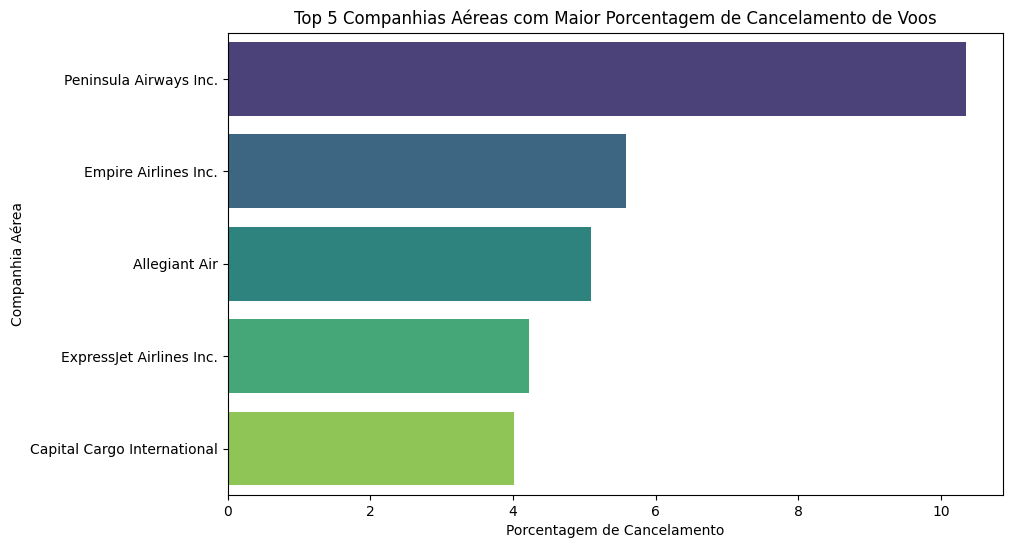

In [85]:
cancel_percent = df.groupby('Airline')['Cancelled'].mean() * 100
top5_companies = cancel_percent.nlargest(5)
plt.figure(figsize=(10, 6))
sns.barplot(x=top5_companies.values, y=top5_companies.index, palette='viridis')
plt.title('Top 5 Companhias Aéreas com Maior Porcentagem de Cancelamento de Voos')
plt.xlabel('Porcentagem de Cancelamento')
plt.ylabel('Companhia Aérea')
plt.show()

As 5 companhias com maior porcentagem de Atraso na partida.

C:\Users\hayan\AppData\Local\Temp\ipykernel_17340\1765926671.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top5_companies_dep.values, y=top5_companies_dep.index, palette='viridis')


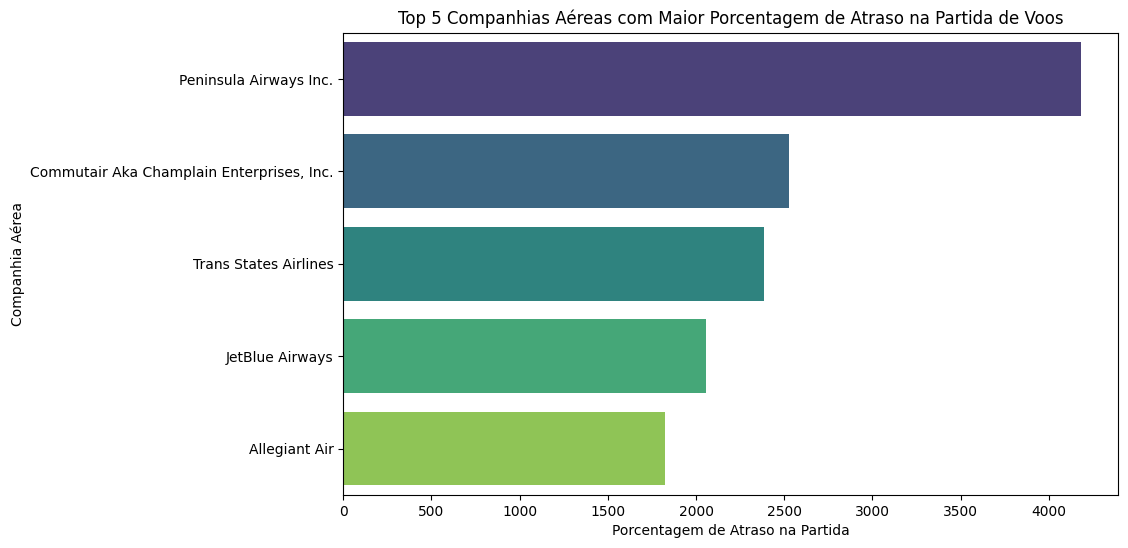

In [86]:
dep_delay_pct = df.groupby('Airline')['DepDelayMinutes'].mean() * 100
top5_companies_dep = dep_delay_pct.nlargest(5)
plt.figure(figsize=(10, 6))
sns.barplot(x=top5_companies_dep.values, y=top5_companies_dep.index, palette='viridis')
plt.title('Top 5 Companhias Aéreas com Maior Porcentagem de Atraso na Partida de Voos')
plt.xlabel('Porcentagem de Atraso na Partida')
plt.ylabel('Companhia Aérea')

plt.show()


As 5 companhias com maior porcentagem de atrasos na chegada.

C:\Users\hayan\AppData\Local\Temp\ipykernel_17340\41878020.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top5_companies_arr.values, y=top5_companies_arr.index, palette='viridis')


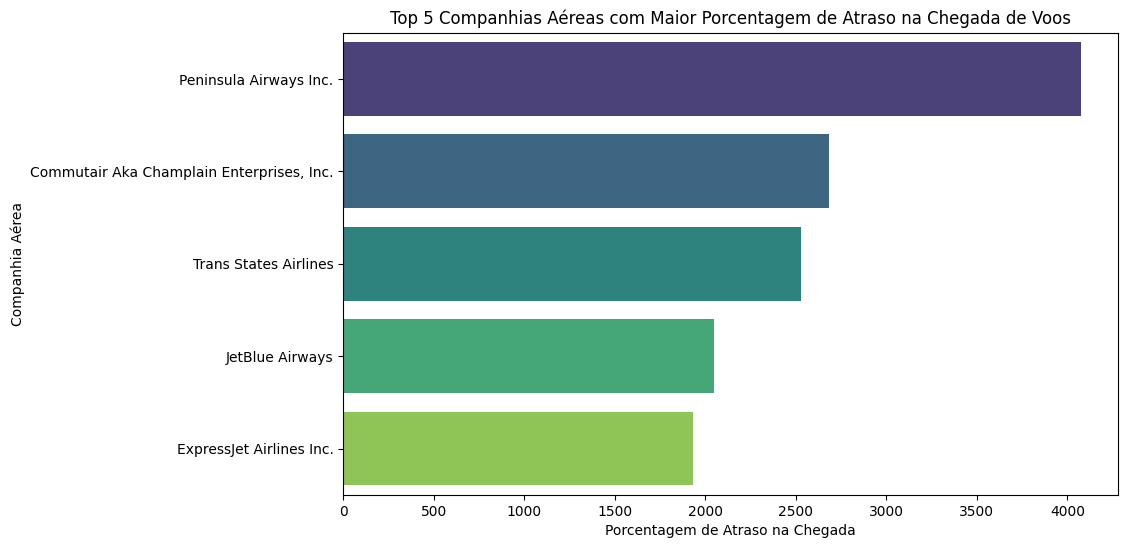

In [87]:
arr_delay_pct = df.groupby('Airline')['ArrDelayMinutes'].mean() * 100
top5_companies_arr = arr_delay_pct.nlargest(5)
plt.figure(figsize=(10, 6))
sns.barplot(x=top5_companies_arr.values, y=top5_companies_arr.index, palette='viridis')

plt.title('Top 5 Companhias Aéreas com Maior Porcentagem de Atraso na Chegada de Voos')
plt.xlabel('Porcentagem de Atraso na Chegada')
plt.ylabel('Companhia Aérea')

plt.show()

# Parte 2: Análise da eficiência das rotas.

### 1 - Quais as principais rotas de voos?

In [88]:
df = df_geral.loc[:, columns_subset]
df
df['Route'] = df['Origin'] + ' to ' + df['Dest']

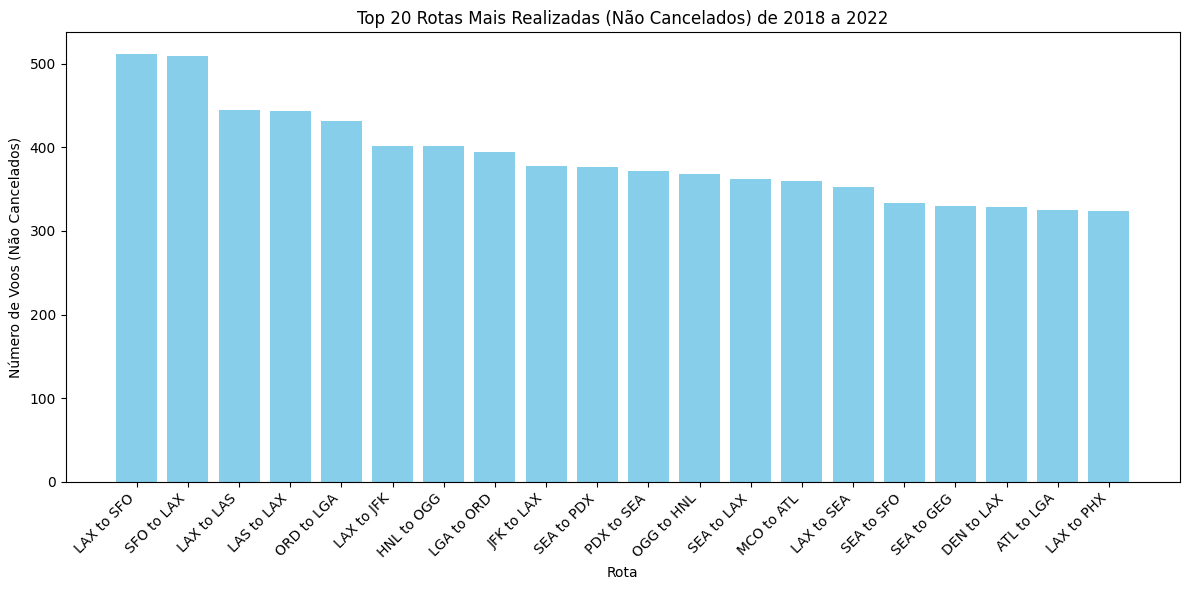

Route  Count
0     LAX to SFO    512
1     SFO to LAX    509
2     LAX to LAS    445
3     LAS to LAX    444
4     ORD to LGA    431
...          ...    ...
7143  BLI to ANC      1
7144  PGD to TTN      1
7145  GSO to TPA      1
7146  DAB to LGA      1
7147  STL to SJU      1

[7148 rows x 2 columns]

In [89]:
# Contagem de Rotas
df_cancelled_false = df[df['Cancelled'] == False]

count_route = df_cancelled_false['Route'].value_counts().reset_index()
count_route.columns = ['Route', 'Count']
plt.figure(figsize=(12, 6))
plt.bar(count_route['Route'][:20], count_route['Count'][:20], color='skyblue')
plt.xlabel('Rota')
plt.ylabel('Número de Voos (Não Cancelados)')
plt.title('Top 20 Rotas Mais Realizadas (Não Cancelados) de 2018 a 2022' )
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

count_route

**ROTA MAIS UTILIZADA LAX to SFO E SFO to LAX**

```
0	LAX to SFO	369
1	SFO to LAX	357
```

Por quê? 

A rota de voo entre Los Angeles International Airport (LAX) e San Francisco International Airport (SFO) é uma das rotas aéreas mais movimentadas nos Estados Unidos por várias razões:

* Importância Econômica:

Los Angeles e San Francisco são duas das cidades mais importantes da Califórnia e dos Estados Unidos em termos econômicos. Ambas têm forte presença no setor de tecnologia, entretenimento, finanças e comércio.

* Setor de Tecnologia:

San Francisco, em particular, é um centro-chave para empresas de tecnologia e startups do Vale do Silício. Muitos profissionais e empresários viajam frequentemente entre essas cidades para reuniões, conferências e negócios.

* Conectividade de Transporte:

A Califórnia é um estado grande e movimentado, e o transporte aéreo entre suas principais cidades é uma opção eficiente para lidar com a demanda de viagens de negócios, lazer e outros propósitos.

* Turismo e Cultura:

Ambas as cidades são destinos turísticos populares, atraindo visitantes de todo o mundo. Los Angeles é conhecida por sua indústria cinematográfica, praias e parques temáticos, enquanto San Francisco é famosa pela Ponte Golden Gate, Alcatraz e sua cultura diversificada.

* Comércio e Negócios:

A proximidade geográfica e a facilidade de transporte entre LAX e SFO tornam essas cidades centros de comércio e negócios interconectados. Muitas empresas têm escritórios em ambas as cidades, incentivando a movimentação constante de profissionais.

* Frequência de Voos:

Devido à alta demanda, as companhias aéreas geralmente oferecem uma ampla gama de voos entre LAX e SFO, proporcionando flexibilidade de horários para os passageiros.

* Conexões e Hub Aéreo:

Ambos os aeroportos, LAX e SFO, são hubs importantes para várias companhias aéreas, proporcionando uma ampla variedade de opções de conexões para outras cidades.
Em resumo, a combinação de fatores econômicos, tecnológicos, culturais, turísticos e a eficiência do transporte aéreo contribuem para a popularidade e alta demanda da rota de voo entre LAX e SFO.






### 2 - Quais as rotas em que temos maior tempo de atraso?

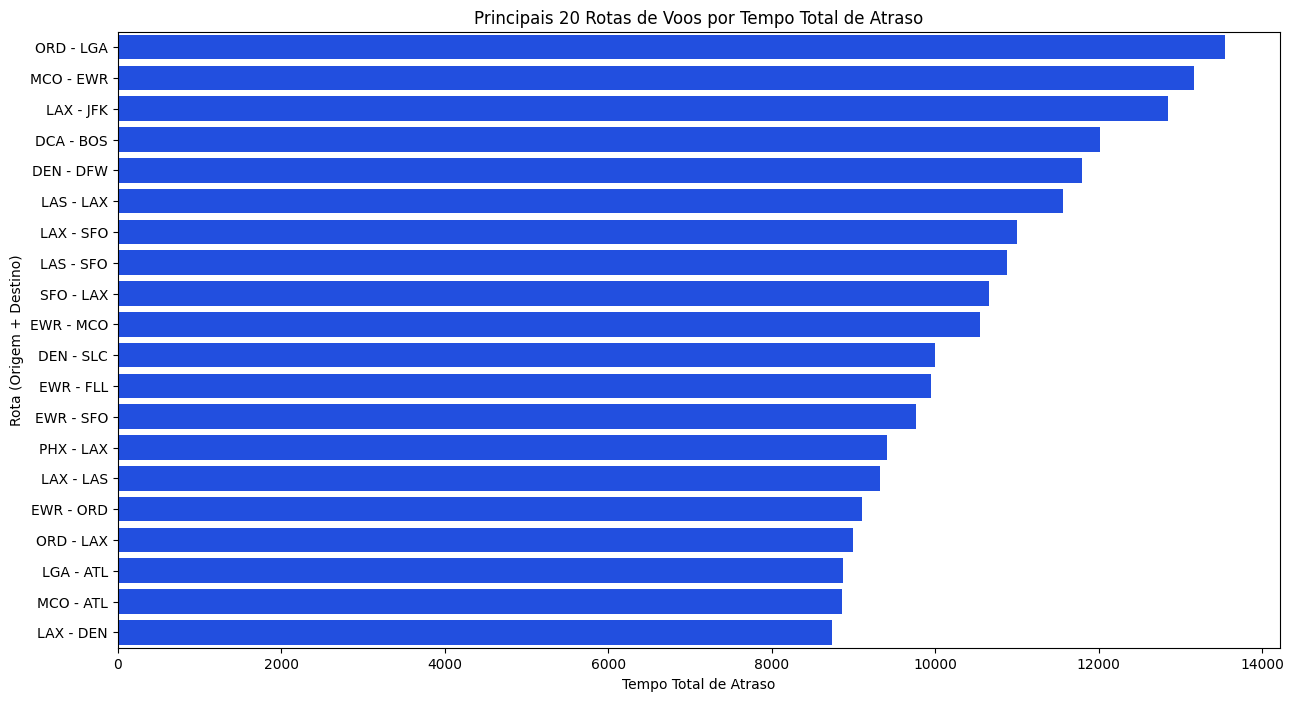

In [90]:
df['TotalDelay'] = df['DepDelayMinutes'] + df['ArrDelayMinutes']
route_delay = df.groupby(['Origin', 'Dest'])['TotalDelay'].sum().reset_index(name='TotalDelay')
top_route_delay = route_delay.nlargest(20, 'TotalDelay')
plt.figure(figsize=(15, 8))
barplot = sns.barplot(x='TotalDelay', y='Rota', data=top_route_delay.assign(Rota=top_route_delay['Origin'] + ' - ' + top_route_delay['Dest']))
plt.title('Principais 20 Rotas de Voos por Tempo Total de Atraso')
plt.xlabel('Tempo Total de Atraso')
plt.ylabel('Rota (Origem + Destino)')

plt.show()


Zorg, Suriname x LGA, NY
Orlando x Nova Jersey

###3 - Quais as rotas em que temos maior índice de cancelamento de voos?

C:\Users\hayan\AppData\Local\Temp\ipykernel_17340\2326274935.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='TotalCancelamentos', y='Rota', data=top_route_cancelled.assign(Rota=top_route_cancelled['Origin'] + ' - ' + top_route_cancelled['Dest']), palette='Reds_d')


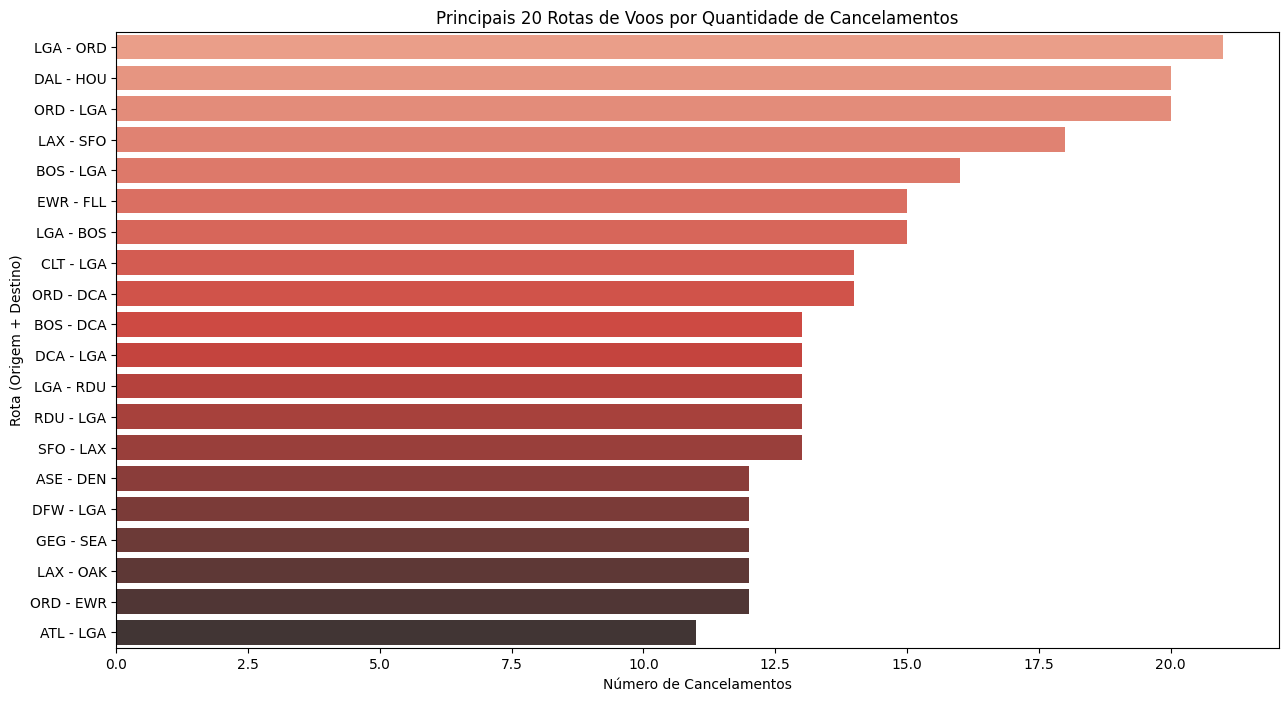

In [91]:
route_cancelled = df.groupby(['Origin', 'Dest'])['Cancelled'].sum().reset_index(name='TotalCancelamentos')
top_route_cancelled = route_cancelled.nlargest(20, 'TotalCancelamentos')
plt.figure(figsize=(15, 8))
barplot = sns.barplot(x='TotalCancelamentos', y='Rota', data=top_route_cancelled.assign(Rota=top_route_cancelled['Origin'] + ' - ' + top_route_cancelled['Dest']), palette='Reds_d')
plt.title('Principais 20 Rotas de Voos por Quantidade de Cancelamentos')
plt.xlabel('Número de Cancelamentos')
plt.ylabel('Rota (Origem + Destino)')

plt.show()

### 4 - Quais são as rotas mais eficientes e as menos eficientes?


O indicador de eficiência de voo horizontal em rota é calculado com base em três trajetórias diferentes:

[artigo completo](https://ansperformance.eu/efficiency/hfe/)


1.   a trajetória real voada
2.   a trajetória planeada
3. a rota restrita mais curta fornecida pelo gestor da rede. É expresso como uma proporção de distâncias e, portanto, é uma média por distância dentro de um determinado espaço aéreo (distância alcançada por distância voada).



As ineficiências horizontais em rota têm impacto em termos de consumo de combustível e emissões. Quanto menor for a eficiência, maiores serão o consumo adicional de combustível e as emissões.

In [92]:
# rota mais eficiente e menos eficiente - eficiencia distancia/tempo
df['Efficiency_Actual'] = (df['AirTime'] / df['Distance']) * 100


efficiency_by_route = df.groupby('Route').agg({
    'Efficiency_Actual': 'median', }).reset_index()

print(efficiency_by_route[['Route', 'Efficiency_Actual']])

print('-----------------------------------------------------------')

most_efficient_route = efficiency_by_route.loc[efficiency_by_route['Efficiency_Actual'].idxmin()]
print("Rota mais eficiente:", most_efficient_route['Route'])
print("Porcentagem de eficiência:", most_efficient_route['Efficiency_Actual'])

print('-----------------------------------------------------------')

most_inefficient_route = efficiency_by_route.loc[efficiency_by_route['Efficiency_Actual'].idxmax()]
print("Rota mais ineficiente:", most_inefficient_route['Route'])
print("Porcentagem de eficiência:", most_inefficient_route['Efficiency_Actual'])




           Route  Efficiency_Actual
0     ABE to ATL          14.812139
1     ABE to BNA          13.722628
2     ABE to CLT          17.671518
3     ABE to DTW          17.764706
4     ABE to FLL          13.544669
...          ...                ...
7164  YAK to CDV          17.370892
7165  YAK to JNU          17.171717
7166  YKM to SEA          27.184466
7167  YUM to DFW          12.328767
7168  YUM to PHX          20.000000

[7169 rows x 2 columns]
-----------------------------------------------------------
Rota mais eficiente: KOA to DFW
Porcentagem de eficiência: 9.693877551020408
-----------------------------------------------------------
Rota mais ineficiente: SAV to HHH
Porcentagem de eficiência: 46.666666666666664


Atrasos = para atrasos considerado apenas o DepDelayMinutes

Diferença em minutos entre o horário de partida programado e o real. Partidas antecipadas definidas como 0



Delays are divided into three categories:

* "On time or small delay" (up to 15 minutes delay),
* "Medium delay" (15 – 45 minutes delay) and
* "Large delay" ( 45 minutes delay).



In [93]:
df["DelayGroup"] = None
df.loc[df["DepDelayMinutes"] == 0, "DelayGroup"] = "On Time"
df.loc[
    (df["DepDelayMinutes"] > 0) & (df["DepDelayMinutes"] <= 15), "DelayGroup"
] = "Small Delay"
df.loc[
    (df["DepDelayMinutes"] > 15) & (df["DepDelayMinutes"] <= 45), "DelayGroup"
] = "Medium Delay"
df.loc[df["DepDelayMinutes"] > 45, "DelayGroup"] = "Large Delay"
df.loc[df["Cancelled"], "DelayGroup"] = "Cancelado"

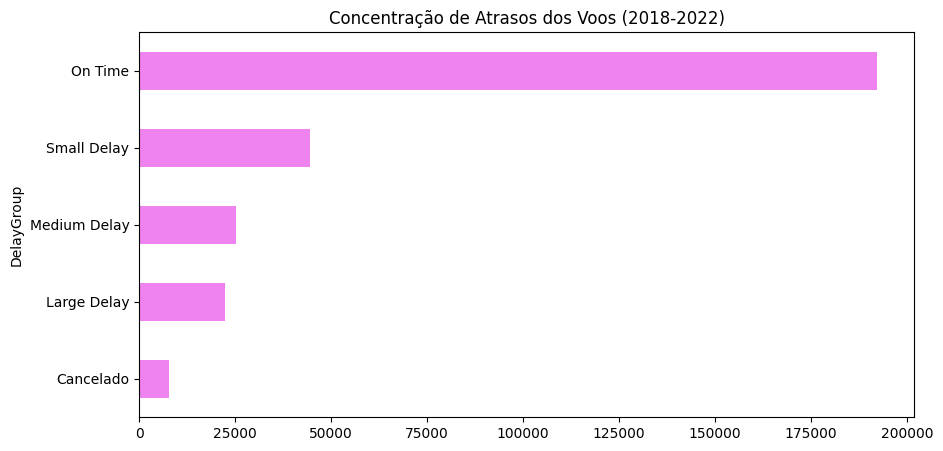

In [94]:
df["DelayGroup"].value_counts(ascending=True).plot(
    kind="barh", figsize=(10, 5), color= 'violet', title="Concentração de Atrasos dos Voos (2018-2022)"
)
plt.show()

In [95]:
top_airlines = (
    df["Airline"]
    .value_counts()
    .reset_index()
    .query("Airline > 1_000_000")["index"]
    .values.tolist()
)

df_top = df.loc[df["Airline"].isin(top_airlines)].reset_index(drop=True).copy()

TypeError: '>' not supported between instances of 'str' and 'int'

In [ ]:
df["Year"] = df["FlightDate"]
df_agg = df.groupby("Year")["DelayGroup"].value_counts(normalize=True).unstack() * 100
col_order = ["No Horário", "Pequeno Atraso", "Médio Atraso", "Grande Atraso", "Cancelado"]
df_agg[col_order].style.background_gradient(cmap="Greens")

In [ ]:
df["Month"] = df["FlightDate"]
df_agg = df.groupby("Month")["DelayGroup"].value_counts(normalize=True).unstack() * 100
col_order = ["No Horário", "Pequeno Atraso", "Médio Atraso", "Grande Atraso", "Cancelado"]
df_agg[col_order].style.background_gradient(cmap="Blues")

In [98]:
!pip install calmap plotly_calplot -q

In [ ]:
from plotly_calplot import calplot

events = df.groupby("FlightDate")["Cancelled"].mean()

# plotando
fig = calplot(events.apply(np.log).reset_index(), x="FlightDate", y="Cancelled")
fig.show()

# Parte 3: Análise do atraso das rotas

### 1 - Qual o tempo médio de atraso dos voos?

In [ ]:
different_routes = df[['Airline', 'Origin', 'Dest']].drop_duplicates().shape[0]
print(f'Total de rotas é: {different_routes}')

In [ ]:
medium_delay_arr = round(df['ArrDelayMinutes'].mean(), 2)
medium_delay_dep = round(df['DepDelayMinutes'].mean(), 2)

print(f'Tempo médio de atraso na chegada: {medium_delay_arr} minutos')
print(f'Tempo médio de atraso na partida: {medium_delay_dep} minutos')

In [ ]:
mean_delay_dep = df.groupby('Airline')['DepDelayMinutes'].mean().reset_index()
mean_delay_dep = mean_delay_dep.rename(columns={'DepDelayMinutes': 'MediaAtrasoPartida'})

mean_delay_arr = df.groupby('Airline')['ArrDelayMinutes'].mean().reset_index()
mean_delay_arr = mean_delay_arr.rename(columns={'ArrDelayMinutes': 'MediaAtrasoChegada'})

media_atraso_por_companhia = pd.merge(mean_delay_dep, mean_delay_arr, on='Airline')

plt.figure(figsize=(15, 8))
bar_width = 0.35
index = range(len(media_atraso_por_companhia))

plt.bar(index, media_atraso_por_companhia['MediaAtrasoPartida'], width=bar_width, label='Partida', color='blue')
plt.bar([i + bar_width for i in index], media_atraso_por_companhia['MediaAtrasoChegada'], width=bar_width, label='Chegada', color='orange')

plt.xlabel('Companhia Aérea')
plt.ylabel('Tempo Médio de Atraso (minutos)')
plt.title('Tempo Médio de Atraso por Companhia Aérea (Partida e Chegada)')
plt.xticks([i + bar_width/2 for i in index], media_atraso_por_companhia['Airline'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


### 2 - Quais os fatores mais correlacionados com o atraso de um voo?

Fatores correlacionados ao atraso nos voos:
- Atraso da operadora;
- Atraso meteorológico;
- Atraso do Sistema Aéreo Nacional;
- Atraso de segurança;
- Atraso de partida;
- Atraso de chegada;
- Atraso tardio da aeronave.

In [ ]:
c = df.corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort", ascending=False)

<ipython-input-259-740fc26097e7>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [ ]:
df_corr = (so.loc[lambda x: x < 0.99]).to_frame().reset_index()

In [ ]:
df_corr = df_corr.rename(columns={'level_0': 'colA', 'level_1': 'colB', 0: 'corr'})

In [ ]:
pd.set_option('display.max_rows', 150)

In [ ]:
df_corr.head(100)

colA               colB      corr
0            Distance            AirTime  0.984009
1             AirTime           Distance  0.984009
2     ArrDelayMinutes    DepDelayMinutes  0.979006
3     DepDelayMinutes    ArrDelayMinutes  0.979006
4             DepTime         CRSDepTime  0.959749
5          CRSDepTime            DepTime  0.959749
6          CRSArrTime            ArrTime  0.853183
7             ArrTime         CRSArrTime  0.853183
8          CRSArrTime         CRSDepTime  0.714275
9          CRSDepTime         CRSArrTime  0.714275
10            DepTime         CRSArrTime  0.713627
11         CRSArrTime            DepTime  0.713627
12            ArrTime            DepTime  0.656367
13            DepTime            ArrTime  0.656367
14         CRSDepTime            ArrTime  0.634380
15            ArrTime         CRSDepTime  0.634380
16  Efficiency_Actual           Distance  0.598004
17           Distance  Efficiency_Actual  0.598004
18            AirTime  Efficiency_Actual  0.533651
19  Efficiency_Actual            AirTime  0.533651
20    DepDelayMinutes            DepTime  0.116956
21            DepTime    DepDelayMinutes  0.116956
22            DepTime         TotalDelay  0.112231
23         TotalDelay            DepTime  0.112231
24            DepTime    ArrDelayMinutes  0.106351
25    ArrDelayMinutes            DepTime  0.106351
26    DepDelayMinutes         CRSDepTime  0.084096
27         CRSDepTime    DepDelayMinutes  0.084096
28         CRSDepTime         TotalDelay  0.079701
29         TotalDelay         CRSDepTime  0.079701
30         CRSDepTime    ArrDelayMinutes  0.074276
31    ArrDelayMinutes         CRSDepTime  0.074276
32    DepDelayMinutes         CRSArrTime  0.069912
33         CRSArrTime    DepDelayMinutes  0.069912
34         TotalDelay         CRSArrTime  0.067803
35         CRSArrTime         TotalDelay  0.067803
36    ArrDelayMinutes         CRSArrTime  0.064776
37         CRSArrTime    ArrDelayMinutes  0.064776
38         CRSArrTime  Efficiency_Actual  0.056805
39  Efficiency_Actual         CRSArrTime  0.056805
40            ArrTime  Efficiency_Actual  0.040346
41  Efficiency_Actual            ArrTime  0.040346
42            AirTime         CRSArrTime  0.027352
43         CRSArrTime            AirTime  0.027352
44         CRSArrTime           Distance  0.026793
45           Distance         CRSArrTime  0.026793
46    DepDelayMinutes          Cancelled  0.025011
47          Cancelled    DepDelayMinutes  0.025011
48  Efficiency_Actual    ArrDelayMinutes  0.024806
49    ArrDelayMinutes  Efficiency_Actual  0.024806
50            DepTime            AirTime  0.023358
51            AirTime            DepTime  0.023358
52          Cancelled           Distance  0.022690
53           Distance          Cancelled  0.022690
54            ArrTime    DepDelayMinutes  0.019768
55    DepDelayMinutes            ArrTime  0.019768
56            ArrTime            AirTime  0.019128
57            AirTime            ArrTime  0.019128
58            ArrTime         TotalDelay  0.019078
59         TotalDelay            ArrTime  0.019078
60           Distance            DepTime  0.019052
61            DepTime           Distance  0.019052
62         CRSDepTime            AirTime  0.018936
63            AirTime         CRSDepTime  0.018936
64            ArrTime    ArrDelayMinutes  0.018094
65    ArrDelayMinutes            ArrTime  0.018094
66           Distance            ArrTime  0.016887
67            ArrTime           Distance  0.016887
68            AirTime    ArrDelayMinutes  0.015814
69    ArrDelayMinutes            AirTime  0.015814
70           Diverted    DepDelayMinutes  0.015327
71    DepDelayMinutes           Diverted  0.015327
72         CRSDepTime           Distance  0.013510
73           Distance         CRSDepTime  0.013510
74         TotalDelay            AirTime  0.013164
75            AirTime         TotalDelay  0.013164
76           Diverted           Distance  0.011256
77           Distance           Diverte

# Parte 4: Modelo em Produção

## Analisando as variáveis correlacionadas

In [96]:
flights_2018 = pd.read_csv('Sample_combined_flights_2018.csv')
flights_2019 = pd.read_csv('Sample_combined_flights_2019.csv')
flights_2020 = pd.read_csv('Sample_combined_flights_2020.csv')
flights_2021 = pd.read_csv('Sample_combined_flights_2021.csv')
flights_2022 = pd.read_csv('Sample_combined_flights_2022.csv')
airlines = pd.read_csv('Airlines.csv')

all_flights = pd.concat([flights_2018, flights_2019, flights_2020, flights_2021, flights_2022], ignore_index=True)


print(all_flights.head())


   Unnamed: 0  FlightDate            Airline Origin Dest  Cancelled  Diverted  \
0           0  2018-01-05  Endeavor Air Inc.    ATL  ABY      False     False   
1           1  2018-01-14  Endeavor Air Inc.    ATL  ABY      False     False   
2           2  2018-01-04  Endeavor Air Inc.    EWN  ATL       True     False   
3           3  2018-01-09  Endeavor Air Inc.    FAY  ATL      False     False   
4           4  2018-01-15  Endeavor Air Inc.    CSG  ATL      False     False   

   CRSDepTime  DepTime  DepDelayMinutes  ...  WheelsOff  WheelsOn  TaxiIn  \
0        1037   1032.0              0.0  ...     1052.0    1121.0     3.0   
1        1037   1031.0              0.0  ...     1047.0    1117.0     3.0   
2        1415      NaN              NaN  ...        NaN       NaN     NaN   
3        1853   1850.0              0.0  ...     1900.0    2004.0    17.0   
4         615    625.0             10.0  ...      634.0     656.0     8.0   

   CRSArrTime  ArrDelay  ArrDel15  ArrivalDelayGro

In [ ]:
merged_data = pd.merge(all_flights, airlines, left_on='IATA_Code_Marketing_Airline', right_on='Code', how='left')

print(merged_data.head())

   Unnamed: 0  FlightDate            Airline Origin Dest  Cancelled  Diverted  \
0           0  2018-01-05  Endeavor Air Inc.    ATL  ABY      False     False   
1           1  2018-01-14  Endeavor Air Inc.    ATL  ABY      False     False   
2           2  2018-01-04  Endeavor Air Inc.    EWN  ATL       True     False   
3           3  2018-01-09  Endeavor Air Inc.    FAY  ATL      False     False   
4           4  2018-01-15  Endeavor Air Inc.    CSG  ATL      False     False   

   CRSDepTime  DepTime  DepDelayMinutes  ...  TaxiIn  CRSArrTime  ArrDelay  \
0        1037   1032.0              0.0  ...     3.0        1137     -13.0   
1        1037   1031.0              0.0  ...     3.0        1137     -17.0   
2        1415      NaN              NaN  ...     NaN        1605       NaN   
3        1853   1850.0              0.0  ...    17.0        2030      -9.0   
4         615    625.0             10.0  ...     8.0         711      -7.0   

   ArrDel15  ArrivalDelayGroups  ArrTimeBlk 

In [99]:
# Filtrar apenas voos que ocorreram
filtered_flights = all_flights[(all_flights['Cancelled'] == 0) & (all_flights['Diverted'] == 0)]

# Remover valores vazios
filtered_flights = filtered_flights.dropna()

In [ ]:
filtered_flights.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283522 entries, 0 to 292110
Data columns (total 62 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   Unnamed: 0                               283522 non-null  int64  
 1   FlightDate                               283522 non-null  object 
 2   Airline                                  283522 non-null  object 
 3   Origin                                   283522 non-null  object 
 4   Dest                                     283522 non-null  object 
 5   Cancelled                                283522 non-null  bool   
 6   Diverted                                 283522 non-null  bool   
 7   CRSDepTime                               283522 non-null  int64  
 8   DepTime                                  283522 non-null  float64
 9   DepDelayMinutes                          283522 non-null  float64
 10  DepDelay                             

<Axes: >

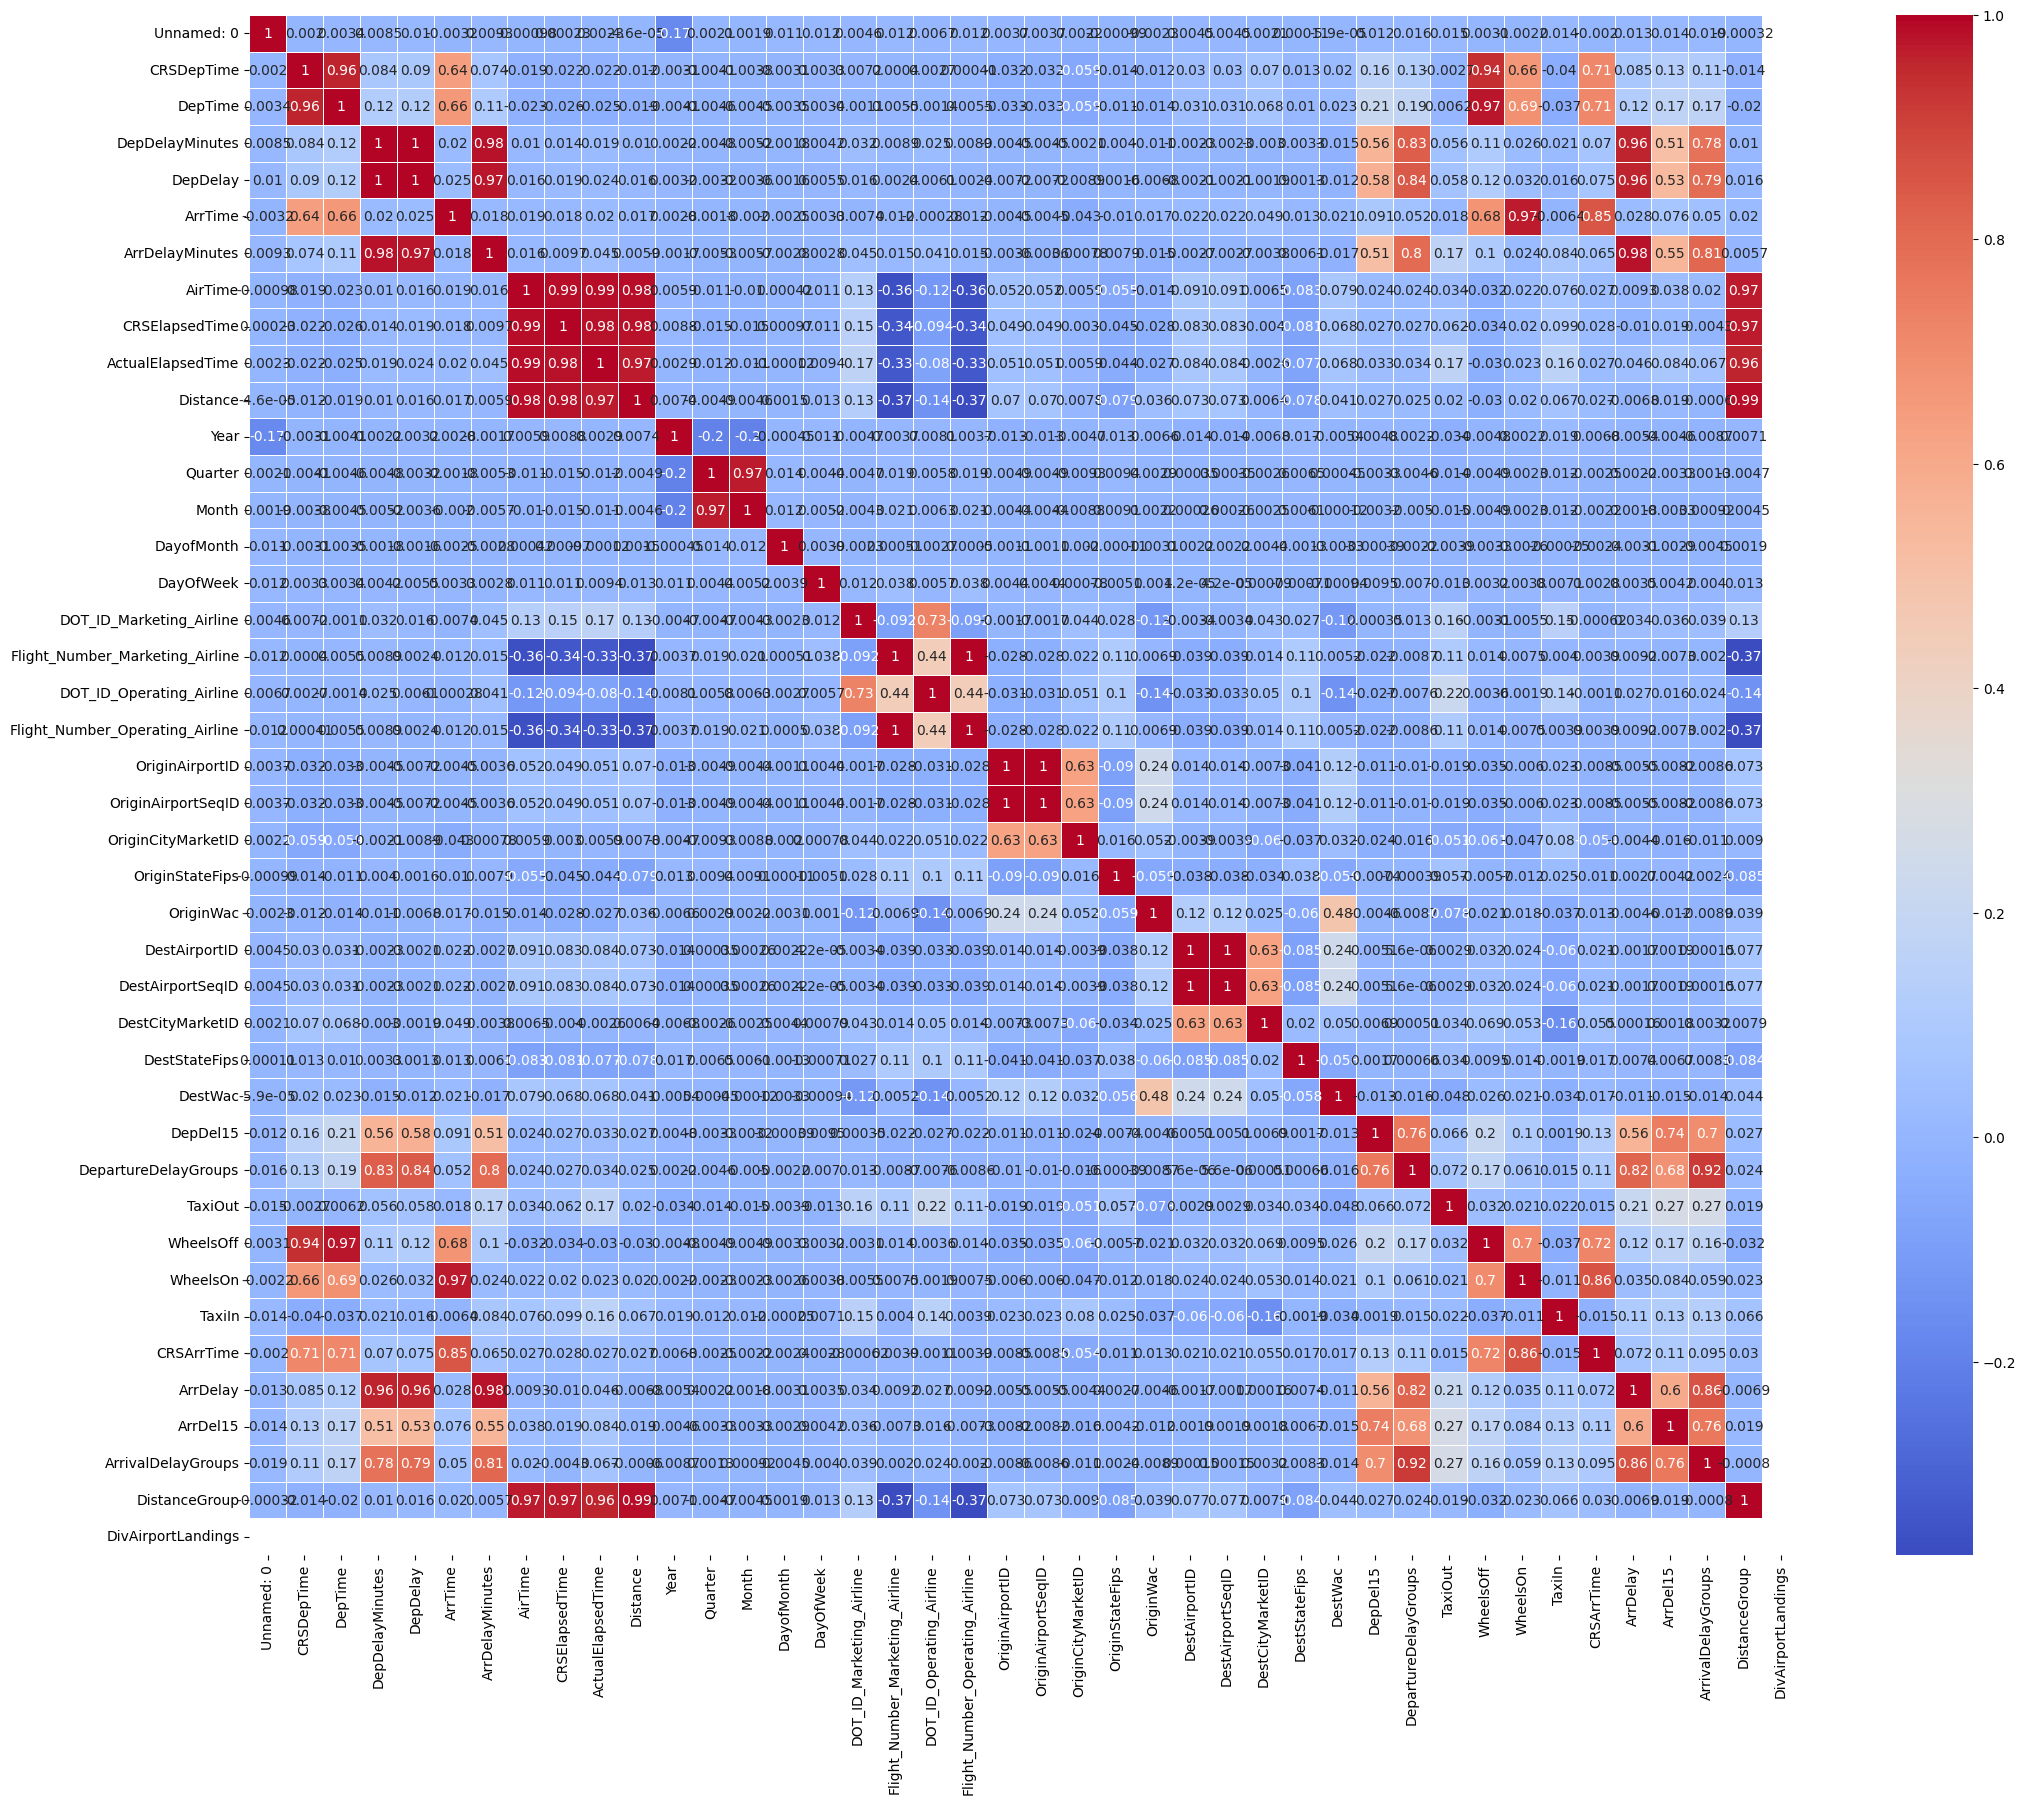

In [102]:
numeric_columns = filtered_flights.select_dtypes(include='number')

# Calcular a matriz de correlação
correlation_matrix = numeric_columns.corr()

# Plotar o heatmap da matriz de correlação
plt.figure(figsize=(25, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)


In [103]:
# Criar variáveis dummy para o mês do ano
dummy_months = pd.get_dummies(filtered_flights['Month'], prefix='Month')

# Concatenar as variáveis dummy aos dados originais
filtered_flights = pd.concat([filtered_flights, dummy_months], axis=1)

In [104]:
# Selecionar variáveis relevantes
features = ['DepDelayMinutes', 'Month', 'DepDelay']
X = filtered_flights[features]
y = filtered_flights['ArrDelayMinutes']

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o modelo
r2 = r2_score(y_test, y_pred)
print(f"R² do modelo: {r2}")

R² do modelo: 0.9610710952488085


In [106]:
# Categorizar os atrasos
filtered_flights['DelayCategory'] = pd.cut(filtered_flights['ArrDelayMinutes'],
                                          bins=[-float('inf'), 15, 30, float('inf')],
                                          labels=['Low Chance', 'Midium', 'Hight'])

In [107]:
# Contar a distribuição das categorias
delay_distribution = filtered_flights['DelayCategory'].value_counts()
print(delay_distribution)

DelayCategory
Low Chance    234961
Hight          31038
Midium         17523
Name: count, dtype: int64


In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

# Fazer previsões no conjunto de treino (você pode usar o conjunto de teste se preferir)
y_pred_train = model.predict(X_train)

# Avaliar o modelo usando o MAE e R²
mae = mean_absolute_error(y_train, y_pred_train)
r2 = r2_score(y_train, y_pred_train)

print(f'MAE (Mean Absolute Error): {mae}')
print(f'R²: {r2}')

MAE (Mean Absolute Error): 4.421833560248127
R²: 0.9580998468618229


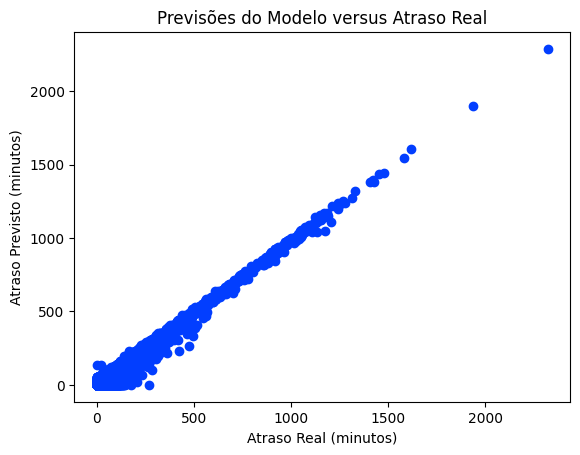

In [ ]:
import matplotlib.pyplot as plt

# Visualizar previsões versus valores reais
plt.scatter(filtered_flights['ArrDelayMinutes'], model.predict(X))
plt.xlabel('Atraso Real (minutos)')
plt.ylabel('Atraso Previsto (minutos)')
plt.title('Previsões do Modelo versus Atraso Real')
plt.show()

### Parte 5: Conclusão

Ao analisarmos as variáveis com maiores correlações, no contexto do modelo em questão, observamos que os resultados apresentam um R2 de 0.96. Este valor sugere uma boa previsão do modelo em relação aos dados utilizados. No entanto, destacamos também que tais métricas não refletem a eficácia de um modelo para prever atrasos em voos.

A precisão no contexto dos dados utilizados não garante, por si só, a capacidade do modelo de lidar com a complexidade do mundo real. Considerando esses pontos, é essencial continuar refinando o modelo, incorporando uma gama mais ampla de variáveis relevantes, efetuando o tratamento das variáveis e utilizando modelos de regressão mais adequados a complexidade dos dados.

----------------------------------------------------------------------------

When analyzing the variables with the highest correlations, in the context of the model in question, we observed that the results present an R2 of 0.96. This value suggests a good prediction of the model in relation to the data used. However, we also highlight that such metrics do not reflect the effectiveness of a model for predicting flight delays.

Accuracy in the context of the data used does not, in itself, guarantee the model's ability to deal with real-world complexity. Considering these points, it is essential to continue refining the model, incorporating a wider range of relevant variables, treating the variables and using regression models that are more appropriate to the complexity of the data.
s

